<a href="https://colab.research.google.com/github/DarshanaHeendeniya/ML_Learning/blob/main/Air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Quality, Weather, and Respiratory Health**

In [1]:
# Importing required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing data and storing in a DataFrame
df = pd.read_csv('/air_quality_health_dataset.csv')
df.tail()

date   region         AQI      PM2.5        PM10        NO2  \
2995  2020-03-16     West  101.549610  62.572040   82.032601  28.188065   
2996  2020-03-17  Central  105.155051  77.289722  103.344355  39.271776   
2997  2020-03-18     East   75.164788  41.738943  111.768944  48.380141   
2998  2020-03-19  Central  106.683528  67.019256   66.300256  38.993041   
2999  2020-03-20    South   96.894819  42.445789   96.023635  30.536862   

            SO2        CO         O3  temperature  ...  school_closures  \
2995  15.451740  1.295485  26.473666    30.823665  ...                0   
2996  26.185755  0.765007  41.684453    28.343987  ...                0   
2997  26.561040  1.235577  39.295269    26.050318  ...                0   
2998  15.579454  0.655209  31.667658    26.028273  ...                0   
2999  19.231074  1.309425  12.106839    27.691147  ...                0   

      public_transport_usage  mask_usage_rate  lockdown_status  \
2995                6.268495        79.924698                0   
2996               21.483037        76.189034                0   
2997               93.894493        60.866306                0   
2998               73.990617        91.471722                0   
2999               83.435240        62.532516                1   

      industrial_activity  vehicle_count  construction_activity  \
2995            63.894720           9727              17.517691   
2996           115.253298           7571              10.698859   
2997            57.151724           1497              42.777210   
2998            66.552816           3412               1.218238   
2999            97.073254           4788              38.134396   

      respiratory_admissions  population_density  green_cover_percentage  
2995                       8         6376.519945               12.957398  
2996                       7         2895.955761               46.956454  
2997                      10         8137.193349               18.919346  
2998                      11         8997.326165               25.754999  
2999                      15          710.756315               40.450717  

[5 rows x 26 columns]

In [3]:
# Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3000 non-null   object 
 1   region                  3000 non-null   object 
 2   AQI                     3000 non-null   float64
 3   PM2.5                   3000 non-null   float64
 4   PM10                    3000 non-null   float64
 5   NO2                     3000 non-null   float64
 6   SO2                     3000 non-null   float64
 7   CO                      3000 non-null   float64
 8   O3                      3000 non-null   float64
 9   temperature             3000 non-null   float64
 10  humidity                3000 non-null   float64
 11  wind_speed              3000 non-null   float64
 12  precipitation           3000 non-null   float64
 13  hospital_visits         3000 non-null   int64  
 14  emergency_visits        3000 non-null   

In [4]:
# Convert the data type of date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    3000 non-null   datetime64[ns]
 1   region                  3000 non-null   object        
 2   AQI                     3000 non-null   float64       
 3   PM2.5                   3000 non-null   float64       
 4   PM10                    3000 non-null   float64       
 5   NO2                     3000 non-null   float64       
 6   SO2                     3000 non-null   float64       
 7   CO                      3000 non-null   float64       
 8   O3                      3000 non-null   float64       
 9   temperature             3000 non-null   float64       
 10  humidity                3000 non-null   float64       
 11  wind_speed              3000 non-null   float64       
 12  precipitation           3000 non-null   float64 

In [5]:
# Setting date as index
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20'],
              dtype='datetime64[ns]', name='date', length=3000, freq=None)

In [6]:
df_north = df[df['region'] == 'North']
df_north.head()

region         AQI      PM2.5        PM10        NO2        SO2  \
date                                                                         
2020-01-09  North   90.610512  76.240366  102.801357  43.051508  18.159709   
2020-01-14  North   61.734395  39.043227  101.883591  41.488088  24.233856   
2020-01-19  North   81.839518  53.232617   77.053195  38.055085  23.190920   
2020-01-26  North  102.218452  54.172188   82.331570  46.946691  22.456370   
2020-02-09  North  103.937225  56.900831   96.346124  39.925192  14.647659   

                  CO         O3  temperature   humidity  ...  school_closures  \
date                                                     ...                    
2020-01-09  0.621089  26.556682    23.437526  40.259227  ...                0   
2020-01-14  1.344256  25.721994    27.529672  29.322632  ...                0   
2020-01-19  0.703025  29.882018    33.358297  82.119957  ...                0   
2020-01-26  0.625509  32.242330    24.956052  75.689512  ...                1   
2020-02-09  1.004735  26.495371    25.420109  73.422530  ...                0   

            public_transport_usage  mask_usage_rate  lockdown_status  \
date                                                                   
2020-01-09               80.791576        75.992329                0   
2020-01-14               28.006780        56.548205                0   
2020-01-19               45.638251        91.999553                0   
2020-01-26               14.596824        66.568644                0   
2020-02-09               29.497365        96.889456                0   

            industrial_activity  vehicle_count  construction_activity  \
date                                                                    
2020-01-09            64.373847           4705              83.640354   
2020-01-14            94.238023           1954              65.015452   
2020-01-19            87.087398           3355              85.111533   
2020-01-26           142.945249           3173              23.227424   
2020-02-09           139.883732           8091              88.884386   

            respiratory_admissions  population_density  green_cover_percentage  
date                                                                            
2020-01-09                       8         1882.424687               63.199856  
2020-01-14                      13         6117.650425               61.556382  
2020-01-19                       9          862.097657               68.290435  
2020-01-26                       9         4461.195347               13.723770  
2020-02-09                       4         2601.936501               13.016513  

[5 rows x 25 columns]

In [7]:
df_north.index

DatetimeIndex(['2020-01-09', '2020-01-14', '2020-01-19', '2020-01-26',
               '2020-02-09', '2020-02-18', '2020-02-19', '2020-02-21',
               '2020-02-28', '2020-03-03',
               ...
               '2020-02-05', '2020-02-10', '2020-02-14', '2020-02-18',
               '2020-02-25', '2020-02-27', '2020-03-01', '2020-03-05',
               '2020-03-10', '2020-03-12'],
              dtype='datetime64[ns]', name='date', length=586, freq=None)

In [8]:
df_north.sort_index(ascending = True, inplace = True)
df_north.head(15)

/tmp/ipython-input-2290948124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north.sort_index(ascending = True, inplace = True)


region         AQI      PM2.5        PM10        NO2        SO2  \
date                                                                         
2020-01-01  North   97.230880  77.828952   67.886400  27.333680  18.045559   
2020-01-02  North  109.243453  59.380610   71.799412  37.198890  20.935345   
2020-01-03  North  140.486192  68.340331   78.583263  37.194283  18.387389   
2020-01-04  North   65.948328  62.175956   66.390119  27.548494  30.201733   
2020-01-05  North  103.794123  32.301404   82.153989  36.538957  14.349417   
2020-01-05  North   88.389531  51.299755  122.225927  37.321013  21.303281   
2020-01-06  North  111.771568  42.653763   62.788692  32.912218  26.587704   
2020-01-09  North   76.082339  61.611666   71.572864  52.237936  23.198688   
2020-01-09  North   90.610512  76.240366  102.801357  43.051508  18.159709   
2020-01-11  North   63.182515  49.279790   45.787933  31.858467  12.253988   
2020-01-13  North  114.395159  62.241841   69.192473  33.352991  13.358241   
2020-01-13  North   82.215183  61.543761   80.447011  36.007434  19.572906   
2020-01-14  North   61.734395  39.043227  101.883591  41.488088  24.233856   
2020-01-15  North  110.353180  45.072773   59.973707  45.724714  21.533485   
2020-01-19  North   81.839518  53.232617   77.053195  38.055085  23.190920   

                  CO         O3  temperature   humidity  ...  school_closures  \
date                                                     ...                    
2020-01-01  0.927937  27.286362    32.296648  51.491412  ...                0   
2020-01-02  1.085104  29.860927    20.253602  35.065952  ...                0   
2020-01-03  1.128037  28.064631    28.730870  33.820070  ...                0   
2020-01-04  1.009085  31.987699    27.417474  74.347540  ...                0   
2020-01-05  0.698291  43.773541    21.116440  87.749539  ...                1   
2020-01-05  0.757072  22.974919    35.114331  53.851488  ...                0   
2020-01-06  0.758379  44.564642    26.342680  53.737701  ...                0   
2020-01-09  0.919078  39.627680    22.449809  53.700752  ...                1   
2020-01-09  0.621089  26.556682    23.437526  40.259227  ...                0   
2020-01-11  0.581632  19.656272    28.972724  81.535529  ...                0   
2020-01-13  0.692217  28.612107    26.940911  80.489917  ...                0   
2020-01-13  1.272358   6.278316    27.204594  86.057613  ...                0   
2020-01-14  1.344256  25.721994    27.529672  29.322632  ...                0   
2020-01-15  0.732261  41.094245    20.061708  84.834211  ...                0   
2020-01-19  0.703025  29.882018    33.358297  82.119957  ...                0   

            public_transport_usage  mask_usage_rate  lockdown_status  \
date                                                                   
2020-01-01               77.122852        88.904353                0   
2020-01-02               72.492180        79.772350                0   
2020-01-03               90.112269        83.234352                0   
2020-01-04               64.007211        72.823294                0   
2020-01-05               68.519340        88.170379                0   
2020-01-05               39.041694        84.272116                0   
2020-01-06               80.321934        74.371904                0   
2020-01-09                3.804721        85.653044                1   
2020-01-09               80.791576        75.992329                0   
2020-01-11               27.627561        70.963908                0   
2020-01-13               44.568879        91.639406                0   
2020-01-13               92.894780        63.414226                0   
2020-01-14               28.006780        56.548205                0   
2020-01-15               82.560633        75.262984                0   
2020-01-19               45.638251        91.999553                0   

            industrial_activity  vehicle_count  construction_activity  \
date    

In [9]:
df_north.drop('region', axis = 1, inplace = True)
df_north.head()

/tmp/ipython-input-2714339395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north.drop('region', axis = 1, inplace = True)


AQI      PM2.5       PM10        NO2        SO2        CO  \
date                                                                           
2020-01-01   97.230880  77.828952  67.886400  27.333680  18.045559  0.927937   
2020-01-02  109.243453  59.380610  71.799412  37.198890  20.935345  1.085104   
2020-01-03  140.486192  68.340331  78.583263  37.194283  18.387389  1.128037   
2020-01-04   65.948328  62.175956  66.390119  27.548494  30.201733  1.009085   
2020-01-05  103.794123  32.301404  82.153989  36.538957  14.349417  0.698291   

                   O3  temperature   humidity  wind_speed  ...  \
date                                                       ...   
2020-01-01  27.286362    32.296648  51.491412    5.402175  ...   
2020-01-02  29.860927    20.253602  35.065952    5.862775  ...   
2020-01-03  28.064631    28.730870  33.820070    4.461378  ...   
2020-01-04  31.987699    27.417474  74.347540    5.140106  ...   
2020-01-05  43.773541    21.116440  87.749539    5.423106  ...   

            school_closures  public_transport_usage  mask_usage_rate  \
date                                                                   
2020-01-01                0               77.122852        88.904353   
2020-01-02                0               72.492180        79.772350   
2020-01-03                0               90.112269        83.234352   
2020-01-04                0               64.007211        72.823294   
2020-01-05                1               68.519340        88.170379   

            lockdown_status  industrial_activity  vehicle_count  \
date                                                              
2020-01-01                0           129.620916           9155   
2020-01-02                0           147.060930           8971   
2020-01-03                0           106.544959           6456   
2020-01-04                0            50.556715           1359   
2020-01-05                0           134.966963           2511   

            construction_activity  respiratory_admissions  population_density  \
date                                                                            
2020-01-01              86.939209                      17         7504.238032   
2020-01-02              12.523466                       8         3589.695413   
2020-01-03              83.622468                      10          647.427286   
2020-01-04              93.698836                       7         7980.884374   
2020-01-05              29.194803                       6         6979.553433   

            green_cover_percentage  
date                                
2020-01-01               19.907385  
2020-01-02               35.347228  
2020-01-03                8.242907  
2020-01-04               60.782821  
2020-01-05               41.780777  

[5 rows x 24 columns]

In [10]:
# Resampling to weekly frequency and calculate the mean
df_north_monthly = df_north.resample('W').mean()
df_north_monthly.head()

AQI      PM2.5       PM10        NO2        SO2        CO  \
date                                                                           
2020-01-05  100.848751  58.554501  81.506518  33.855886  20.537121  0.934254   
2020-01-12   85.411734  57.446396  70.737711  40.015032  20.050022  0.720045   
2020-01-19   90.107487  52.226844  77.709996  38.925662  20.377881  0.948823   
2020-01-26   97.946174  64.893923  77.472320  48.909348  20.740500  1.089309   
2020-02-02  104.235599  55.835505  80.680158  37.704800  24.091254  1.066379   

                   O3  temperature   humidity  wind_speed  ...  \
date                                                       ...   
2020-01-05  30.658013    27.488227  56.054334    5.139107  ...   
2020-01-12  32.601319    25.300685  57.308302    7.179209  ...   
2020-01-19  26.317736    27.019037  72.564866    7.694750  ...   
2020-01-26  26.130202    22.487058  61.978724    8.242206  ...   
2020-02-02  32.914318    23.641274  57.574076    7.730600  ...   

            school_closures  public_transport_usage  mask_usage_rate  \
date                                                                   
2020-01-05         0.166667               68.549258        82.862807   
2020-01-12         0.250000               48.136448        76.745296   
2020-01-19         0.000000               58.733865        75.772875   
2020-01-26         0.200000               24.275082        76.087154   
2020-02-02         0.000000               52.555951        79.357343   

            lockdown_status  industrial_activity  vehicle_count  \
date                                                              
2020-01-05         0.000000           106.572210    4919.833333   
2020-01-12         0.250000           111.715191    5820.000000   
2020-01-19         0.000000            96.663950    3289.800000   
2020-01-26         0.200000            88.377366    3566.800000   
2020-02-02         0.142857           104.412100    5844.000000   

            construction_activity  respiratory_admissions  population_density  \
date                                                                            
2020-01-05              51.461404               10.000000         4849.836876   
2020-01-12              81.806834               12.000000         3652.080700   
2020-01-19              55.475342               12.000000         4246.635609   
2020-01-26              36.483044               10.000000         5834.829943   
2020-02-02              24.921273               10.428571         4651.182808   

            green_cover_percentage  
date                                
2020-01-05               29.551972  
2020-01-12               40.796136  
2020-01-19               57.843219  
2020-01-26               26.646247  
2020-02-02               27.960515  

[5 rows x 24 columns]

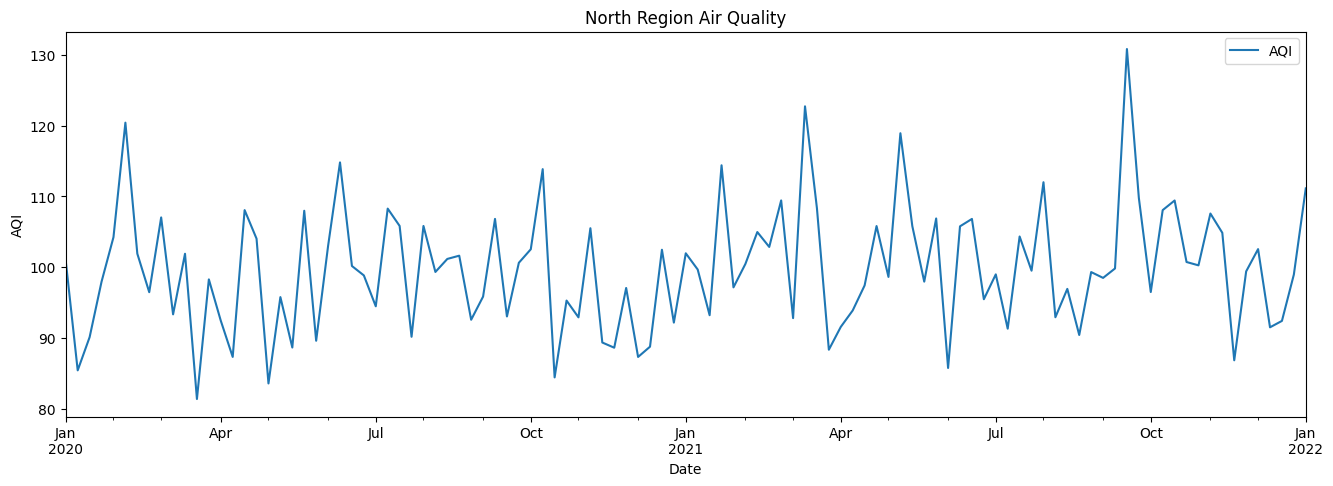

In [11]:
# Plotting North Region AQI
df_north_monthly['AQI'].plot(figsize = (16,5), title = 'North Region Air Quality', xlabel = 'Date', ylabel = 'AQI', legend = True)
plt.show()

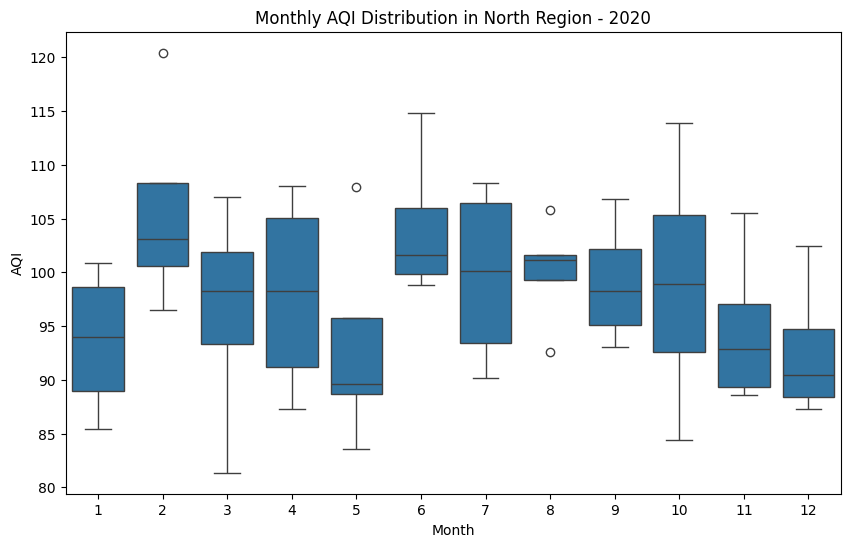

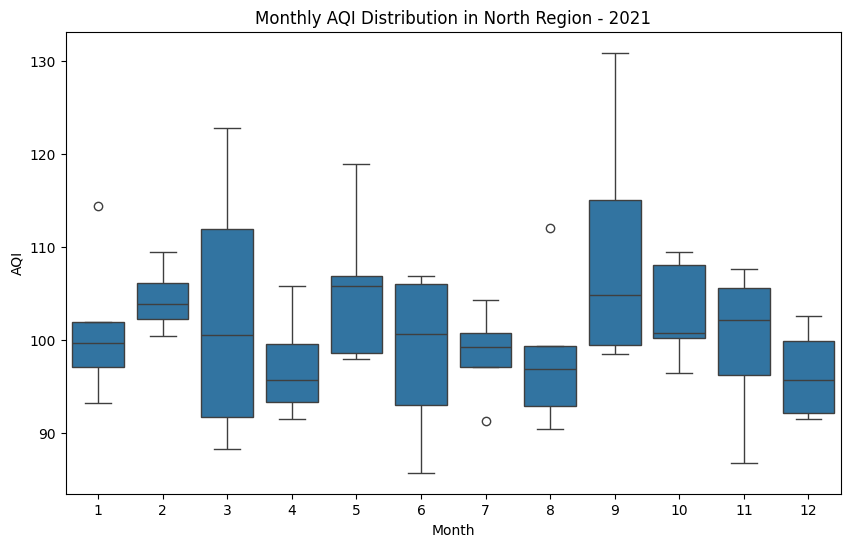

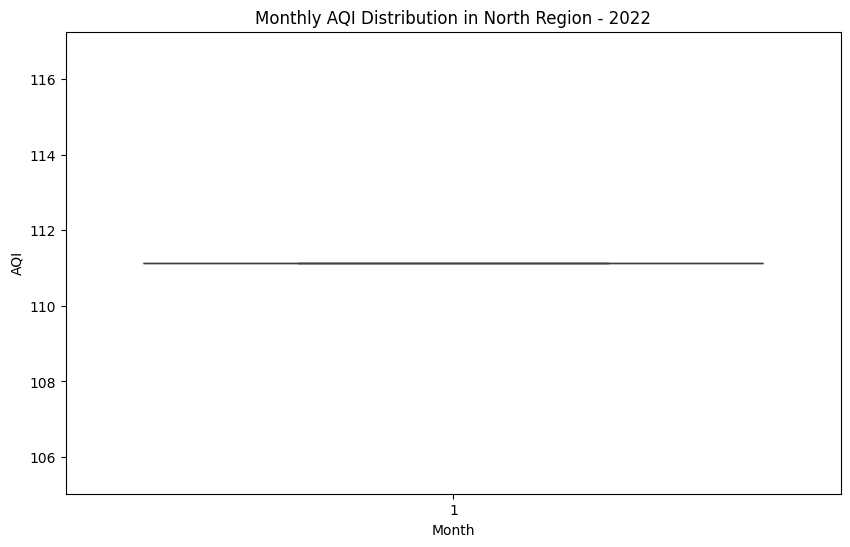

In [12]:
# Display monthly AQI for each year as a box plot
for year in df_north_monthly.index.year.unique():
    plt.figure(figsize=(10, 6))
    df_year = df_north_monthly[df_north_monthly.index.year == year]
    sns.boxplot(x=df_year.index.month, y=df_year['AQI'])
    plt.title(f'Monthly AQI Distribution in North Region - {year}')
    plt.xlabel('Month')
    plt.ylabel('AQI')
    plt.show()

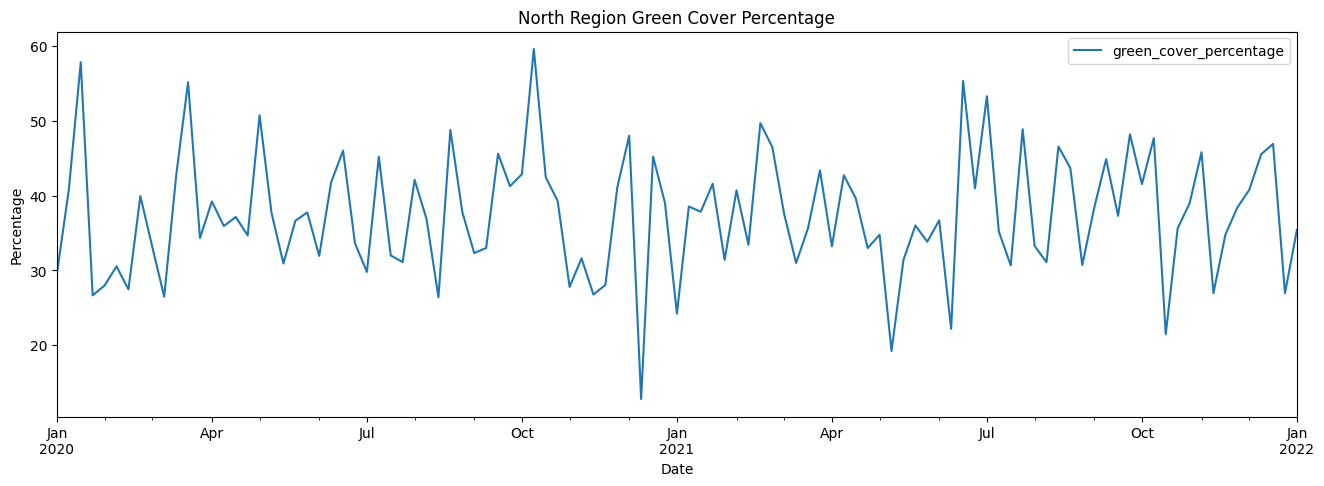

In [13]:
# PLotting green cover percetage of north region
df_north_monthly['green_cover_percentage'].plot(figsize = (16,5), title = 'North Region Green Cover Percentage', xlabel = 'Date', ylabel = 'Percentage', legend = True)
plt.show()

In [14]:
# Calculate the percentage of respiratory admission cases out of population density
df_north_monthly['percent_respiratory_admissions'] = (df_north_monthly['respiratory_admissions'] / df_north_monthly['population_density']) * 100
df_north_monthly.head()

AQI      PM2.5       PM10        NO2        SO2        CO  \
date                                                                           
2020-01-05  100.848751  58.554501  81.506518  33.855886  20.537121  0.934254   
2020-01-12   85.411734  57.446396  70.737711  40.015032  20.050022  0.720045   
2020-01-19   90.107487  52.226844  77.709996  38.925662  20.377881  0.948823   
2020-01-26   97.946174  64.893923  77.472320  48.909348  20.740500  1.089309   
2020-02-02  104.235599  55.835505  80.680158  37.704800  24.091254  1.066379   

                   O3  temperature   humidity  wind_speed  ...  \
date                                                       ...   
2020-01-05  30.658013    27.488227  56.054334    5.139107  ...   
2020-01-12  32.601319    25.300685  57.308302    7.179209  ...   
2020-01-19  26.317736    27.019037  72.564866    7.694750  ...   
2020-01-26  26.130202    22.487058  61.978724    8.242206  ...   
2020-02-02  32.914318    23.641274  57.574076    7.730600  ...   

            public_transport_usage  mask_usage_rate  lockdown_status  \
date                                                                   
2020-01-05               68.549258        82.862807         0.000000   
2020-01-12               48.136448        76.745296         0.250000   
2020-01-19               58.733865        75.772875         0.000000   
2020-01-26               24.275082        76.087154         0.200000   
2020-02-02               52.555951        79.357343         0.142857   

            industrial_activity  vehicle_count  construction_activity  \
date                                                                    
2020-01-05           106.572210    4919.833333              51.461404   
2020-01-12           111.715191    5820.000000              81.806834   
2020-01-19            96.663950    3289.800000              55.475342   
2020-01-26            88.377366    3566.800000              36.483044   
2020-02-02           104.412100    5844.000000              24.921273   

            respiratory_admissions  population_density  \
date                                                     
2020-01-05               10.000000         4849.836876   
2020-01-12               12.000000         3652.080700   
2020-01-19               12.000000         4246.635609   
2020-01-26               10.000000         5834.829943   
2020-02-02               10.428571         4651.182808   

            green_cover_percentage  percent_respiratory_admissions  
date                                                                
2020-01-05               29.551972                        0.206193  
2020-01-12               40.796136                        0.328580  
2020-01-19               57.843219                        0.282577  
2020-01-26               26.646247                        0.171385  
2020-02-02               27.960515                        0.224213  

[5 rows x 25 columns]

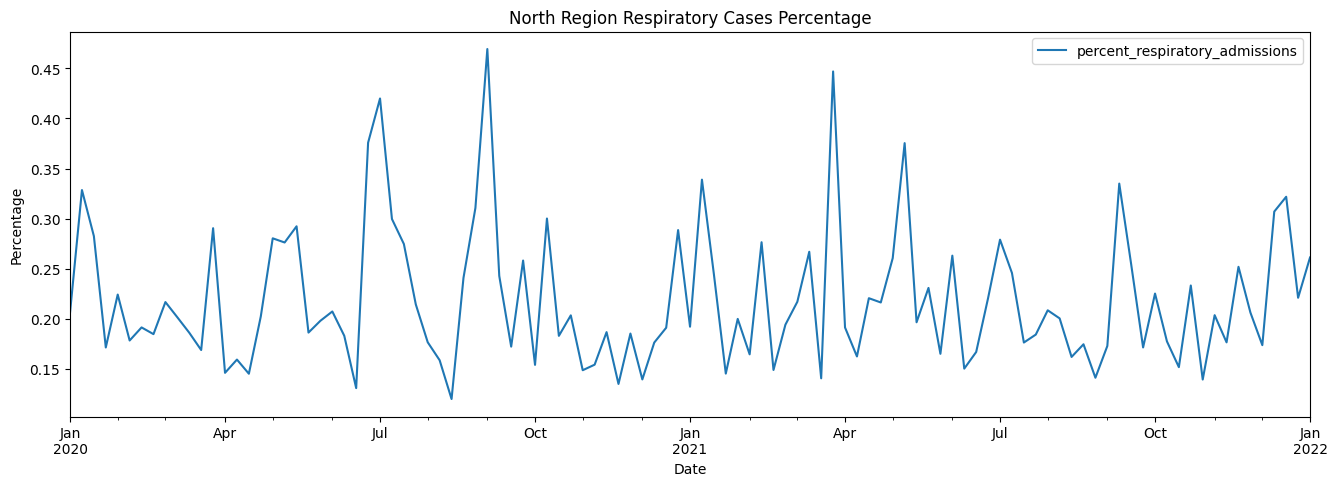

In [15]:
# plotting the percent respiratory admission cases
df_north_monthly['percent_respiratory_admissions'].plot(figsize = (16,5), title = 'North Region Respiratory Cases Percentage', xlabel = 'Date', ylabel = 'Percentage', legend = True)
plt.show()

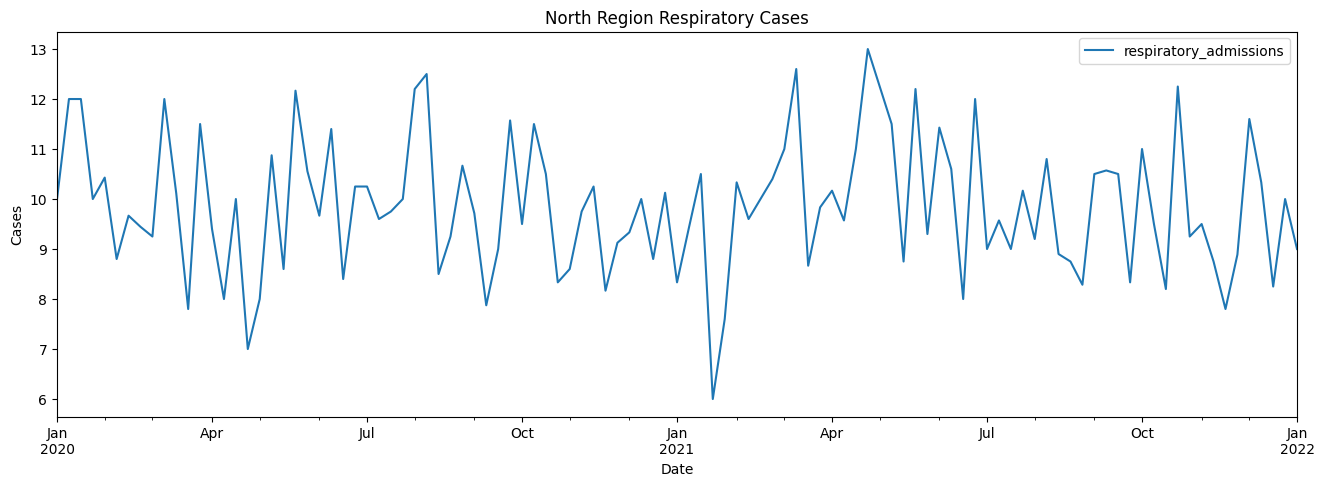

In [16]:
# Plotting respiratory admission cases in north region
df_north_monthly['respiratory_admissions'].plot(figsize = (16,5), title = 'North Region Respiratory Cases', xlabel = 'Date', ylabel = 'Cases', legend = True)
plt.show()

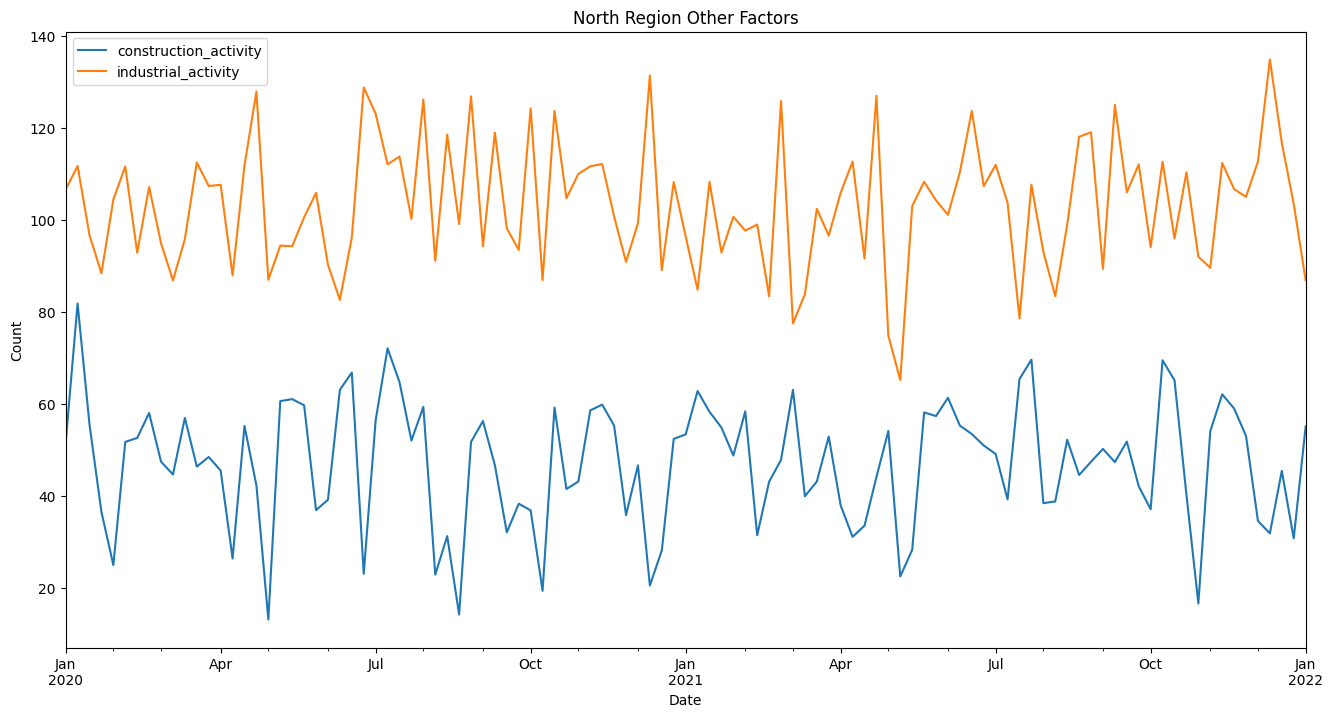

In [17]:
# plotting other factors
df_north_monthly[['construction_activity', 'industrial_activity']].plot(figsize = (16,8), title = 'North Region Other Factors', xlabel = 'Date', ylabel = 'Count', legend = True,)
plt.show()

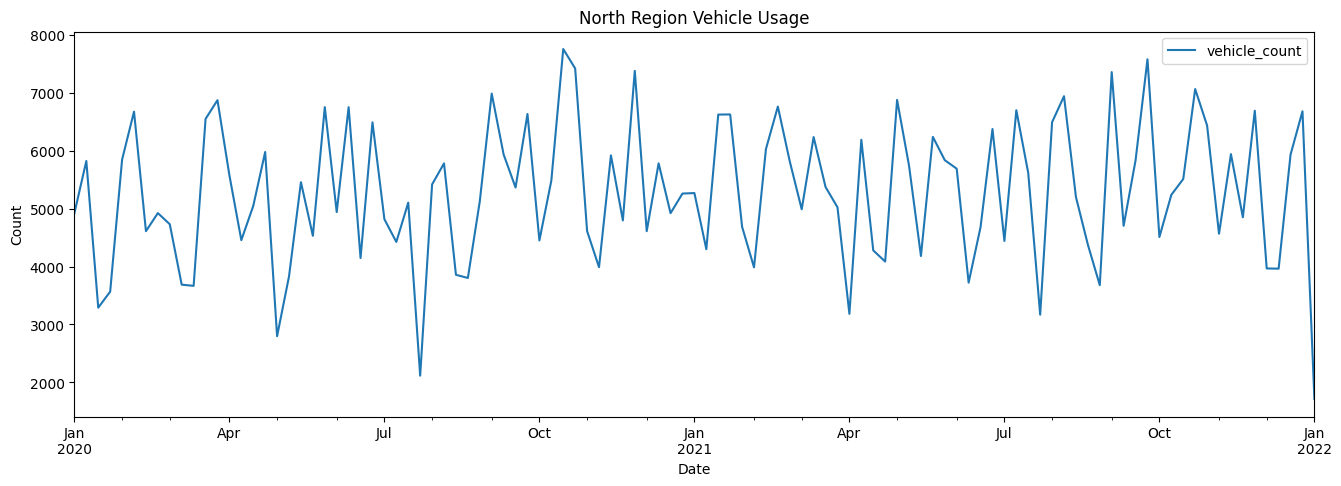

In [18]:
# plotting vehicle usage in north region
df_north_monthly[['vehicle_count']].plot(figsize = (16,5), title = 'North Region Vehicle Usage', xlabel = 'Date', ylabel = 'Count', legend = True)
plt.show()

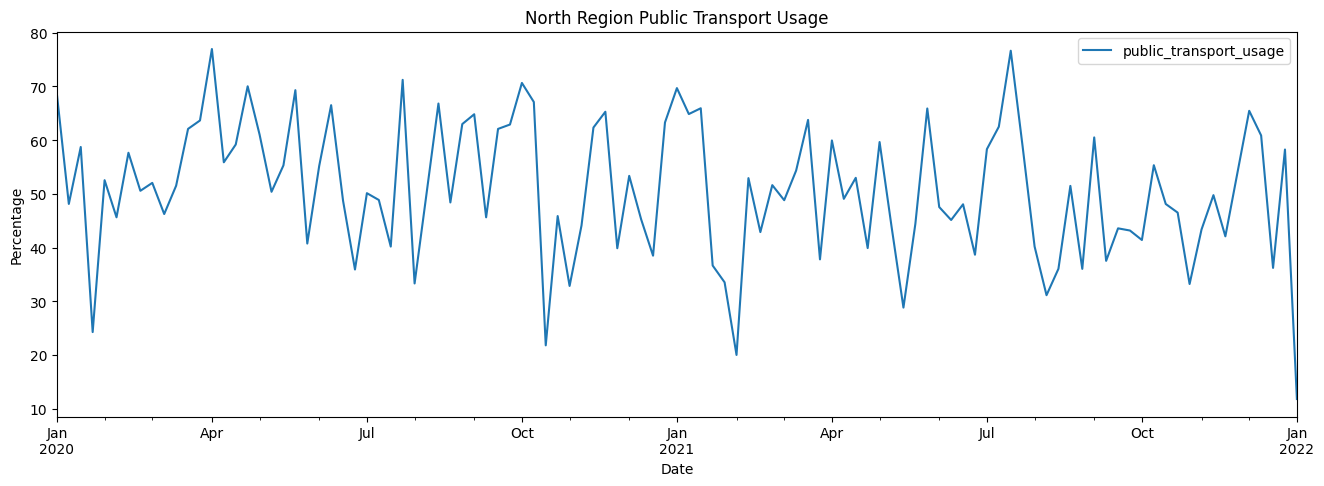

In [19]:
# North region public transport usage
df_north_monthly[['public_transport_usage']].plot(figsize = (16,5), title = 'North Region Public Transport Usage', xlabel = 'Date', ylabel = 'Percentage', legend = True)
plt.show()

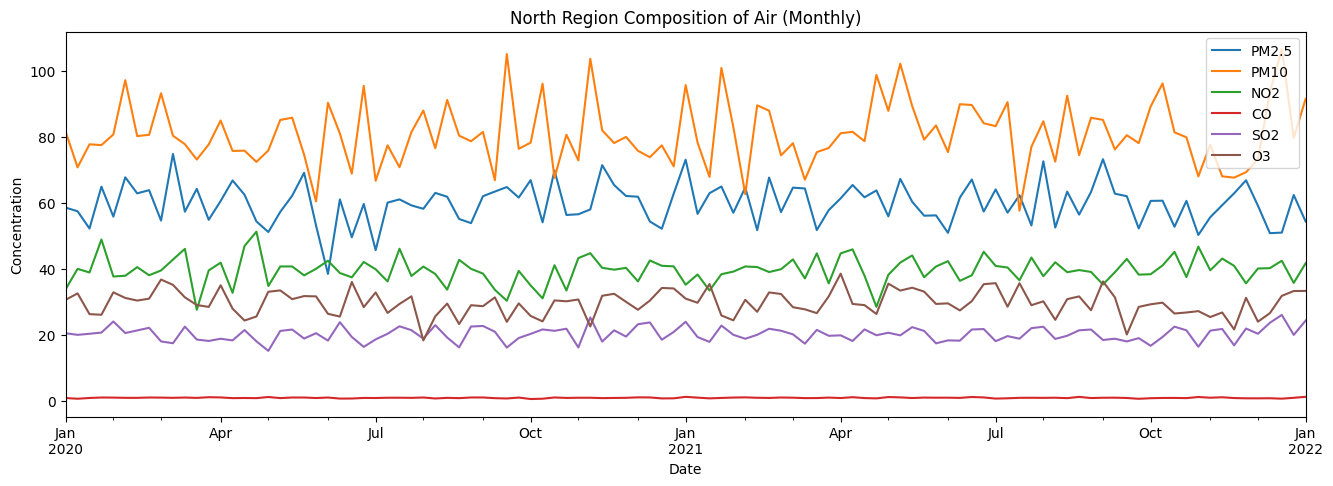

In [20]:
# Composition of air - North region (monthly)
df_north_monthly[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']].plot(figsize = (16,5), title = 'North Region Composition of Air (Monthly)', xlabel = 'Date', ylabel = 'Concentration', legend = True)
plt.show()

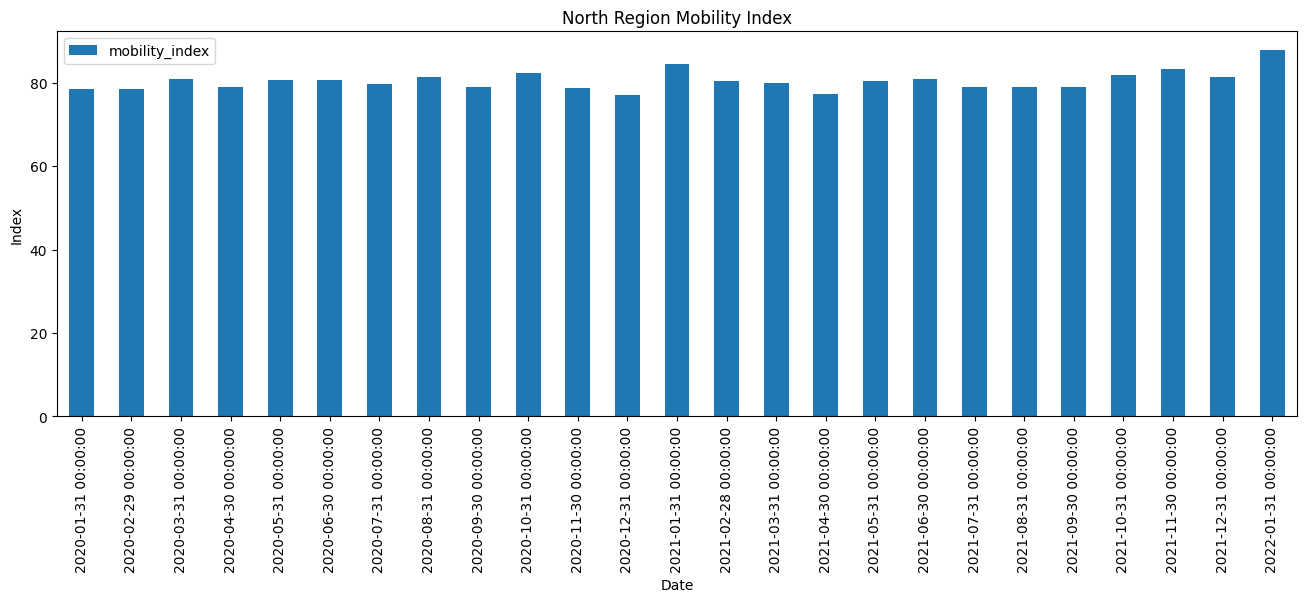

In [21]:
# Plotting monthly mobility index as a barchart
df_north_monthly['mobility_index'].resample('ME').mean().plot(kind = 'bar', figsize = (16,5), title = 'North Region Mobility Index', xlabel = 'Date', ylabel = 'Index', legend = True)
plt.show()

# **North region weather plots**

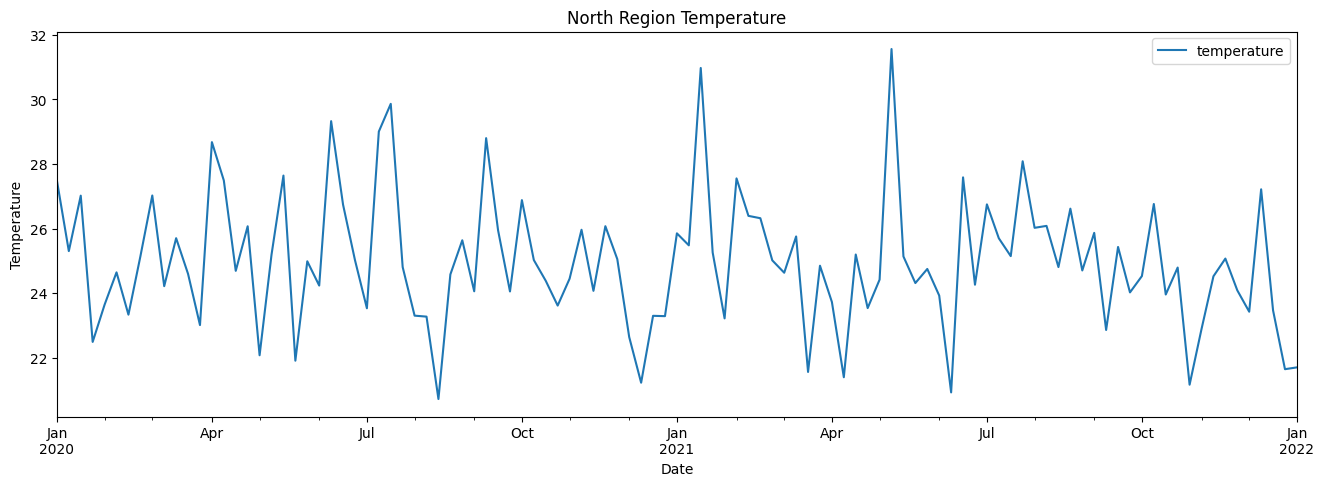

In [22]:
# Monthly temperature North region
df_north_monthly['temperature'].resample('W').mean().plot(figsize = (16,5), title = 'North Region Temperature', xlabel = 'Date', ylabel = 'Temperature', legend = True)
plt.show()

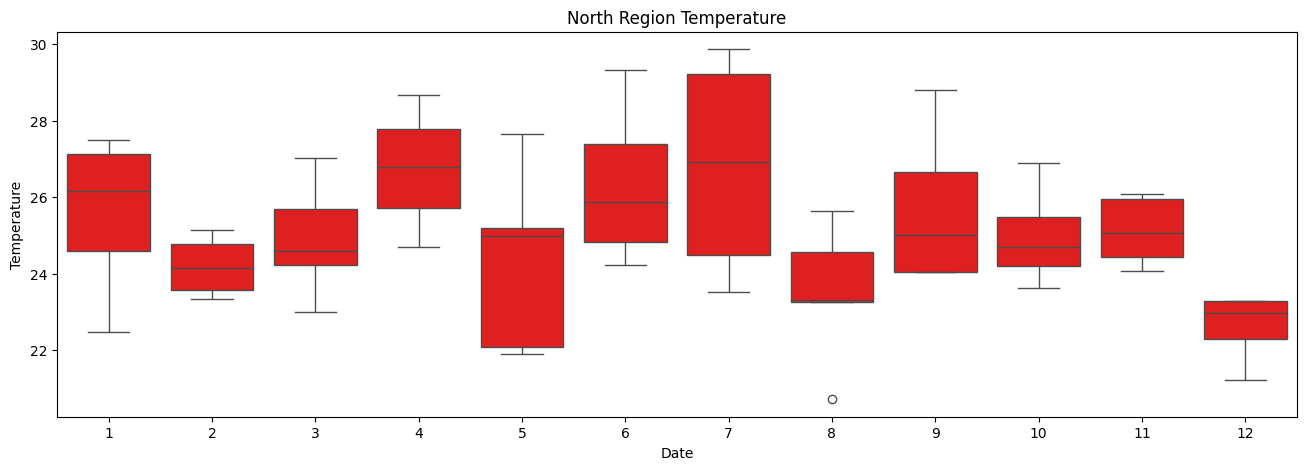

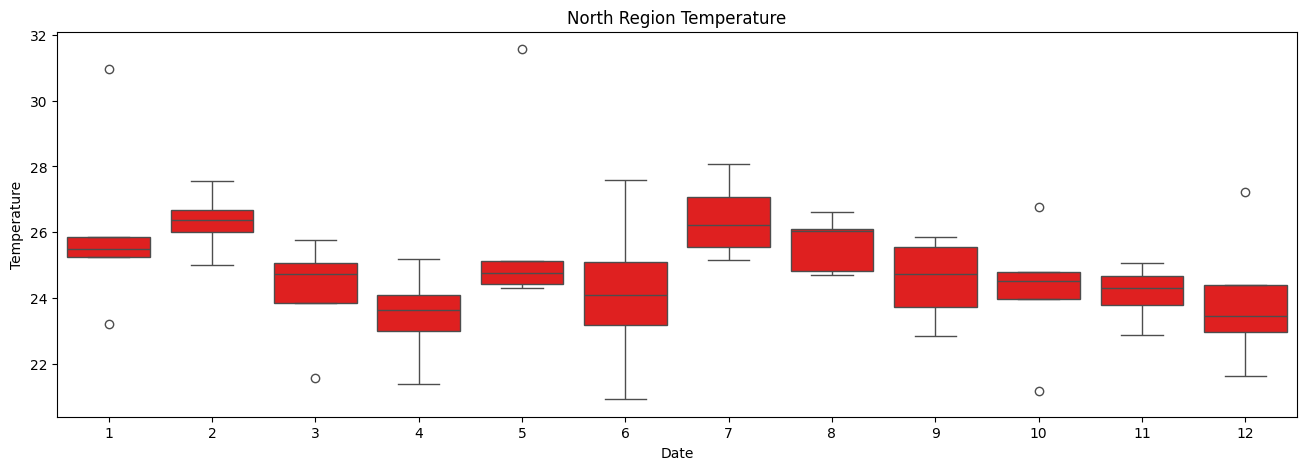

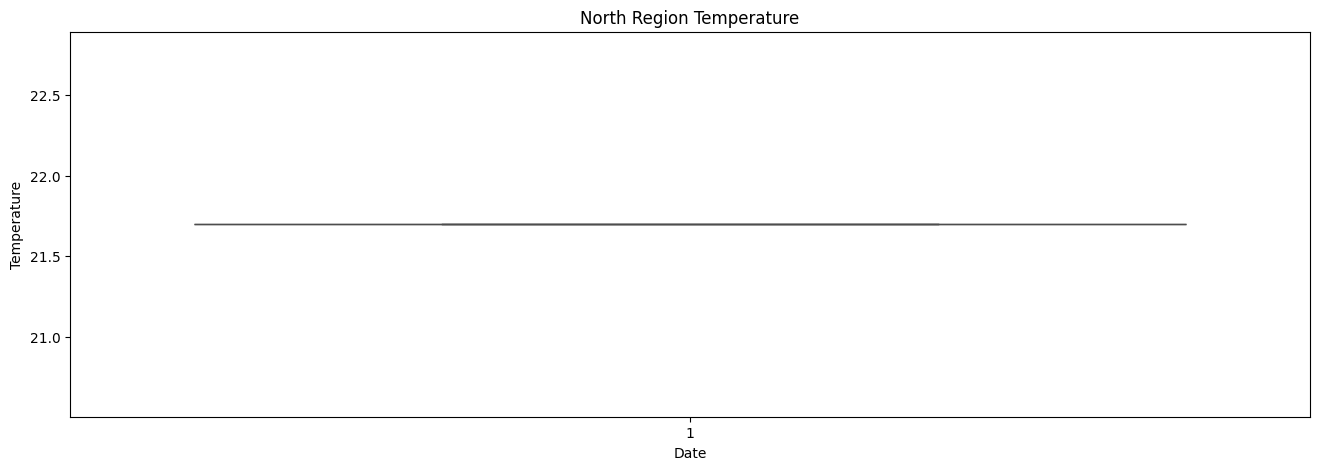

In [23]:
# Monthly temperature North region
for year in df_north_monthly.index.year.unique():
  plt.figure(figsize = (16,5))
  df_year = df_north_monthly[df_north_monthly.index.year == year]
  sns.boxplot(x = df_year.index.month, y = df_year['temperature'], color = 'red')
  plt.title('North Region Temperature')
  plt.xlabel('Date')
  plt.ylabel('Temperature')
  plt.show()

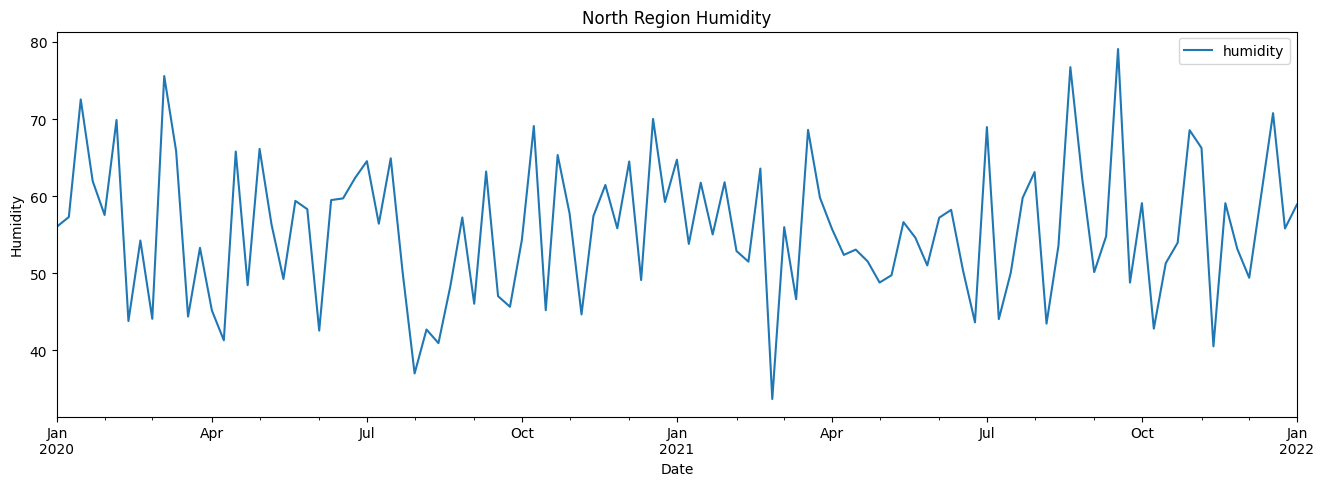

In [24]:
# Change in humidity level
df_north_monthly['humidity'].resample('W').mean().plot(figsize = (16,5), title = 'North Region Humidity', xlabel = 'Date', ylabel = 'Humidity', legend = True)
plt.show()

In [35]:
# Filtering the data of south region
df_south = df[df['region'] == 'South']
df_south.head()

region         AQI      PM2.5       PM10        NO2        SO2  \
date                                                                        
2020-01-05  South   95.316933  68.348297  75.716994  38.445776  20.079543   
2020-01-06  South   95.317261  39.967776  96.743090  28.442924  20.902480   
2020-01-11  South   90.731646  58.595457  78.825591  43.417539  16.942421   
2020-01-12  South   90.685405  79.886950  88.930730  27.016741  23.937717   
2020-01-18  South  106.284947  17.517666  83.886669  32.652568  16.362730   

                  CO         O3  temperature   humidity  ...  vehicle_count  \
date                                                     ...                  
2020-01-05  0.775835  35.996440    26.881835  34.946343  ...           9720   
2020-01-06  0.746096  27.807108    26.932913  36.138268  ...           4069   
2020-01-11  0.900984  37.209149    26.122953  73.517242  ...           4841   
2020-01-12  1.466489  42.990891    24.137378  85.481931  ...           1687   
2020-01-18  0.940419  15.268042    26.806261  70.377821  ...           5216   

            construction_activity  respiratory_admissions  population_density  \
date                                                                            
2020-01-05               6.301105                       8         1277.810175   
2020-01-06              84.842058                       9         6428.622693   
2020-01-11              67.385521                       8         3706.128433   
2020-01-12              29.481429                       7         4488.537166   
2020-01-18              85.140832                      12         3972.553495   

            green_cover_percentage  year  month  day  day_of_week  hour  
date                                                                     
2020-01-05                5.648920  2020      1    5            6     0  
2020-01-06               47.149910  2020      1    6            0     0  
2020-01-11               22.560460  2020      1   11            5     0  
2020-01-12                9.137246  2020      1   12            6     0  
2020-01-18               39.597511  2020      1   18            5     0  

[5 rows x 30 columns]

In [37]:
df_south.index

DatetimeIndex(['2020-01-05', '2020-01-06', '2020-01-11', '2020-01-12',
               '2020-01-18', '2020-01-21', '2020-01-28', '2020-01-30',
               '2020-01-31', '2020-02-02',
               ...
               '2020-01-17', '2020-01-25', '2020-01-28', '2020-02-13',
               '2020-02-17', '2020-02-20', '2020-02-26', '2020-02-28',
               '2020-03-11', '2020-03-20'],
              dtype='datetime64[ns]', name='date', length=619, freq=None)

In [38]:
df_south.sort_index(ascending = True, inplace = True)
df_south.head(15)

/tmp/ipython-input-4267719047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south.sort_index(ascending = True, inplace = True)


region         AQI      PM2.5       PM10        NO2        SO2  \
date                                                                        
2020-01-02  South  114.900106  62.419493  87.855367  43.090544   8.866192   
2020-01-03  South   95.819535  72.646580  56.380550  33.133955  23.485913   
2020-01-04  South   98.716236  61.229832  77.522153  33.883069  24.104836   
2020-01-05  South   95.316933  68.348297  75.716994  38.445776  20.079543   
2020-01-05  South  101.835050  33.714344  57.629530  35.031239  19.821212   
2020-01-06  South   95.317261  39.967776  96.743090  28.442924  20.902480   
2020-01-06  South  105.044808  47.089063  92.857110  40.738869  18.579302   
2020-01-08  South  119.653820  57.609567  86.638369  35.033489  16.850150   
2020-01-10  South  109.757446  73.885083  81.592992  39.576681  19.061530   
2020-01-10  South  120.287401  39.779293  59.441525  44.060940  24.701848   
2020-01-11  South   90.731646  58.595457  78.825591  43.417539  16.942421   
2020-01-12  South   90.685405  79.886950  88.930730  27.016741  23.937717   
2020-01-12  South   87.804342  79.257253  73.880911  40.927431   9.880342   
2020-01-13  South   97.319657  79.424784  55.270434  35.029693  12.232719   
2020-01-15  South   80.871272  95.725703  72.031095  53.655604  26.870679   

                  CO         O3  temperature   humidity  ...  vehicle_count  \
date                                                     ...                  
2020-01-02  1.008541  35.381816    27.470881  29.745416  ...           7802   
2020-01-03  1.147935  33.565148    27.292934  39.754291  ...           9637   
2020-01-04  0.807054  29.981541    21.757769  88.962499  ...           8028   
2020-01-05  0.775835  35.996440    26.881835  34.946343  ...           9720   
2020-01-05  0.632032  35.108133    25.152524  81.362541  ...           2637   
2020-01-06  0.746096  27.807108    26.932913  36.138268  ...           4069   
2020-01-06  0.944258  28.597533    22.310855  43.814638  ...           3281   
2020-01-08  1.093971  10.567101    27.497504  67.665687  ...           1631   
2020-01-10  1.008752  25.906449    20.394870  60.073403  ...           3558   
2020-01-10  0.203475  30.349121    16.689863  64.217649  ...           8665   
2020-01-11  0.900984  37.209149    26.122953  73.517242  ...           4841   
2020-01-12  1.466489  42.990891    24.137378  85.481931  ...           1687   
2020-01-12  1.120815  28.888218    24.510171  42.199473  ...           6713   
2020-01-13  1.187569  16.791573    24.300607  20.304241  ...           4354   
2020-01-15  0.599552  35.387671    25.084599  69.408574  ...           8253   

            construction_activity  respiratory_admissions  population_density  \
date                                                                            
2020-01-02              67.774142                      13         7896.608059   
2020-01-03              84.418247                       9         8671.865478   
2020-01-04              84.586864                      11         3508.989152   
2020-01-05               6.301105                       8         1277.810175   
2020-01-05              15.537356                       5         2597.944867   
2020-01-06              84.842058                       9         6428.622693   
2020-01-06              33.981631                      10         1227.875323   
2020-01-08              49.314609                      10          592.640343   
2020-01-10              66.715595                       9         2420.129492   
2020-01-10              40.405967                      16         1439.248239   
2020-01-11              67.385521                       8         3706.128433   
2020-01-12              29.481429                       7         4488.537166   
2020-01-12              23.184339                       9         2024.050564   
2020-01-13              79.457794                      13         1524.010886   
2020-01-15              97.765799                      10    

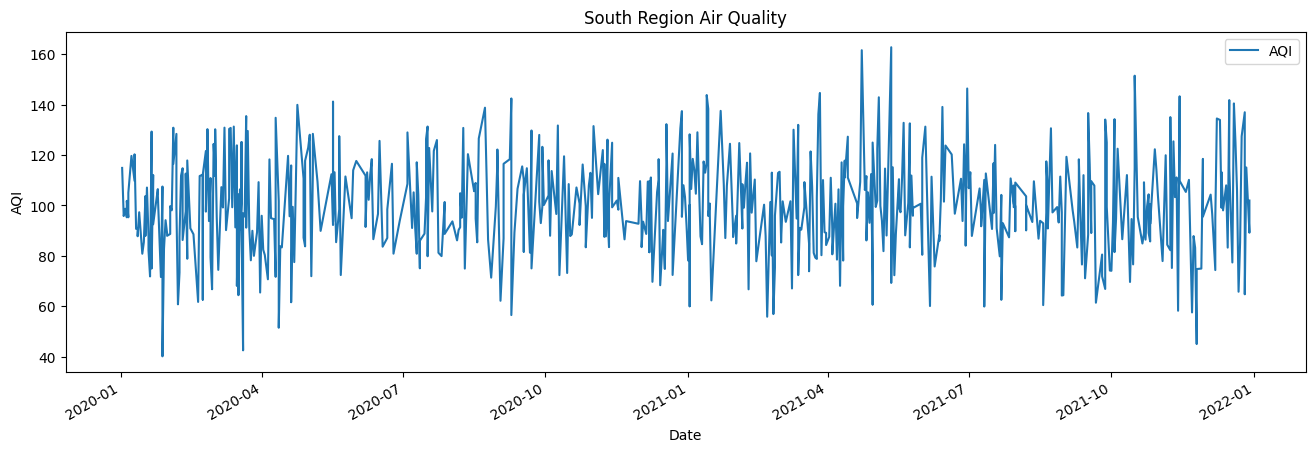

In [39]:
# Plotting the AQI of south region
df_south['AQI'].plot(figsize = (16,5), title = 'South Region Air Quality', xlabel = 'Date', ylabel = 'AQI', legend = True)
plt.show()

In [46]:
# Calculate 7day moving average of AQI in south region
df_south['7day_rolling_AQI'] = df_south['AQI'].rolling(window = 7).mean()
df_south.head()

/tmp/ipython-input-1955764674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south['7day_rolling_AQI'] = df_south['AQI'].rolling(window = 7).mean()


region         AQI      PM2.5       PM10        NO2        SO2  \
date                                                                        
2020-01-02  South  114.900106  62.419493  87.855367  43.090544   8.866192   
2020-01-03  South   95.819535  72.646580  56.380550  33.133955  23.485913   
2020-01-04  South   98.716236  61.229832  77.522153  33.883069  24.104836   
2020-01-05  South   95.316933  68.348297  75.716994  38.445776  20.079543   
2020-01-05  South  101.835050  33.714344  57.629530  35.031239  19.821212   

                  CO         O3  temperature   humidity  ...  \
date                                                     ...   
2020-01-02  1.008541  35.381816    27.470881  29.745416  ...   
2020-01-03  1.147935  33.565148    27.292934  39.754291  ...   
2020-01-04  0.807054  29.981541    21.757769  88.962499  ...   
2020-01-05  0.775835  35.996440    26.881835  34.946343  ...   
2020-01-05  0.632032  35.108133    25.152524  81.362541  ...   

            construction_activity  respiratory_admissions  population_density  \
date                                                                            
2020-01-02              67.774142                      13         7896.608059   
2020-01-03              84.418247                       9         8671.865478   
2020-01-04              84.586864                      11         3508.989152   
2020-01-05               6.301105                       8         1277.810175   
2020-01-05              15.537356                       5         2597.944867   

            green_cover_percentage  year  month  day  day_of_week  hour  \
date                                                                      
2020-01-02               51.757246  2020      1    2            3     0   
2020-01-03               61.250985  2020      1    3            4     0   
2020-01-04               66.954526  2020      1    4            5     0   
2020-01-05                5.648920  2020      1    5            6     0   
2020-01-05               35.008533  2020      1    5            6     0   

            7day_rolling_AQI  
date                          
2020-01-02               NaN  
2020-01-03               NaN  
2020-01-04               NaN  
2020-01-05               NaN  
2020-01-05               NaN  

[5 rows x 31 columns]

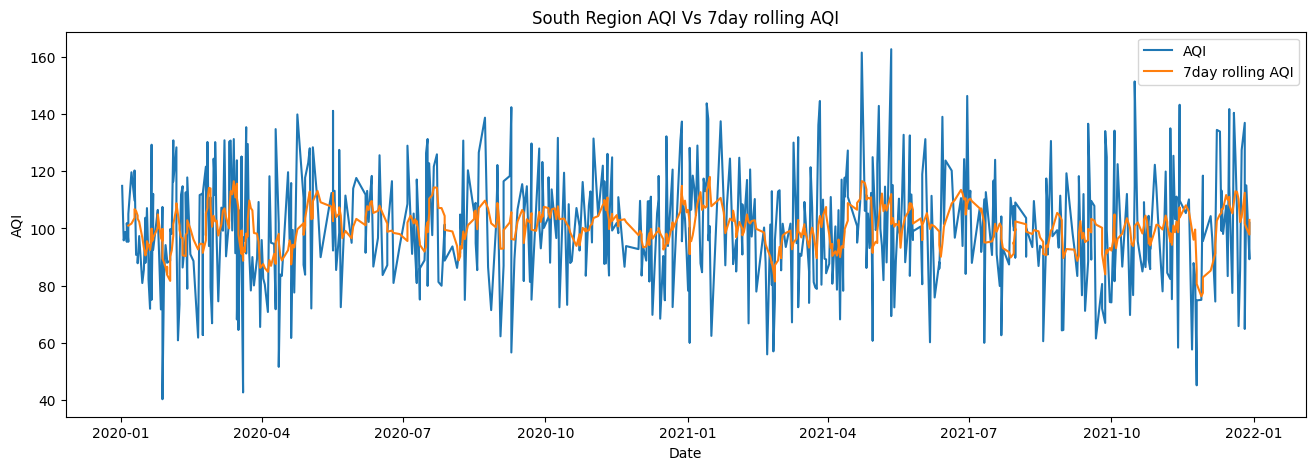

In [49]:
# Plotting AQI and 7day rolling AQI for South region
plt.figure(figsize = (16,5))
plt.plot(df_south['AQI'], label = 'AQI')
plt.plot(df_south['7day_rolling_AQI'], label = '7day rolling AQI')
plt.title('South Region AQI Vs 7day rolling AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

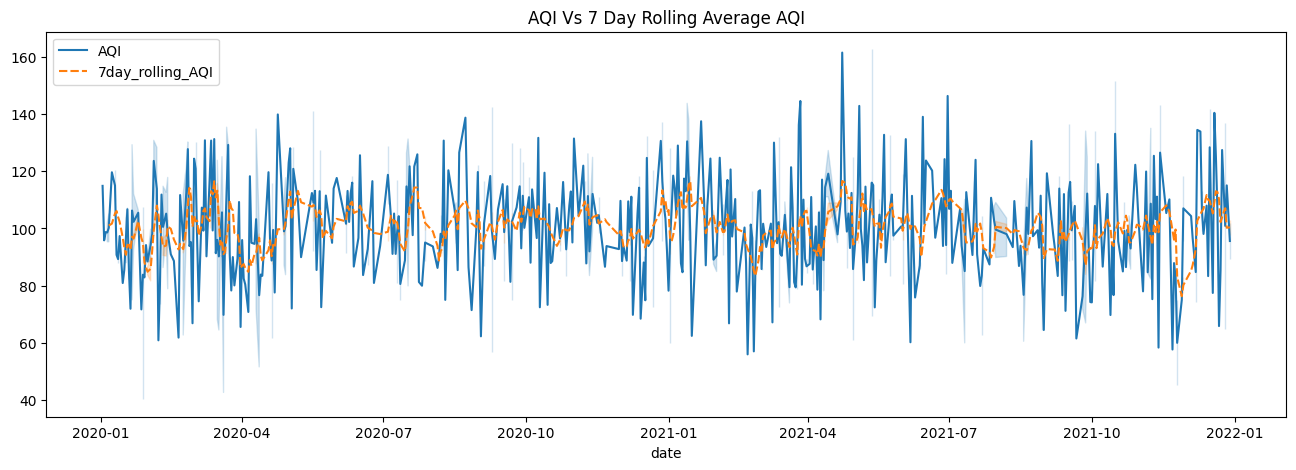

In [48]:
# Plotting AQI and 7day rolling AQI of South region
plt.figure(figsize = (16,5))
sns.lineplot(df_south[['AQI', '7day_rolling_AQI']], color = 'red')
plt.title('AQI Vs 7 Day Rolling Average AQI')

plt.show()

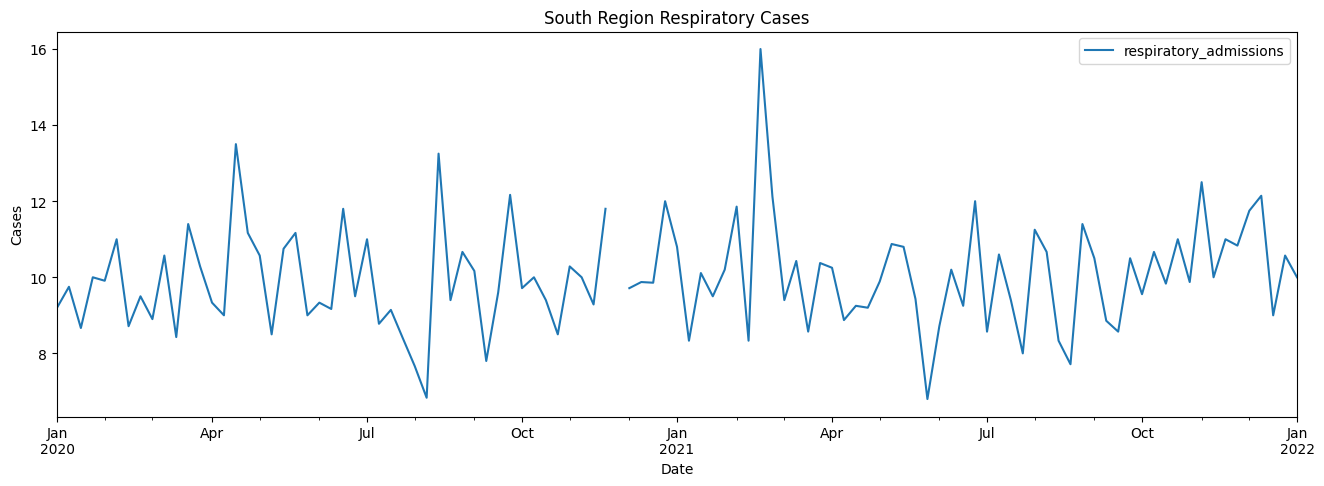

In [50]:
# Plotting respiratory admissions reported in South region
df_south['respiratory_admissions'].resample('W').mean().plot(figsize = (16,5), title = 'South Region Respiratory Cases', xlabel = 'Date', ylabel = 'Cases', legend = True)
plt.show()

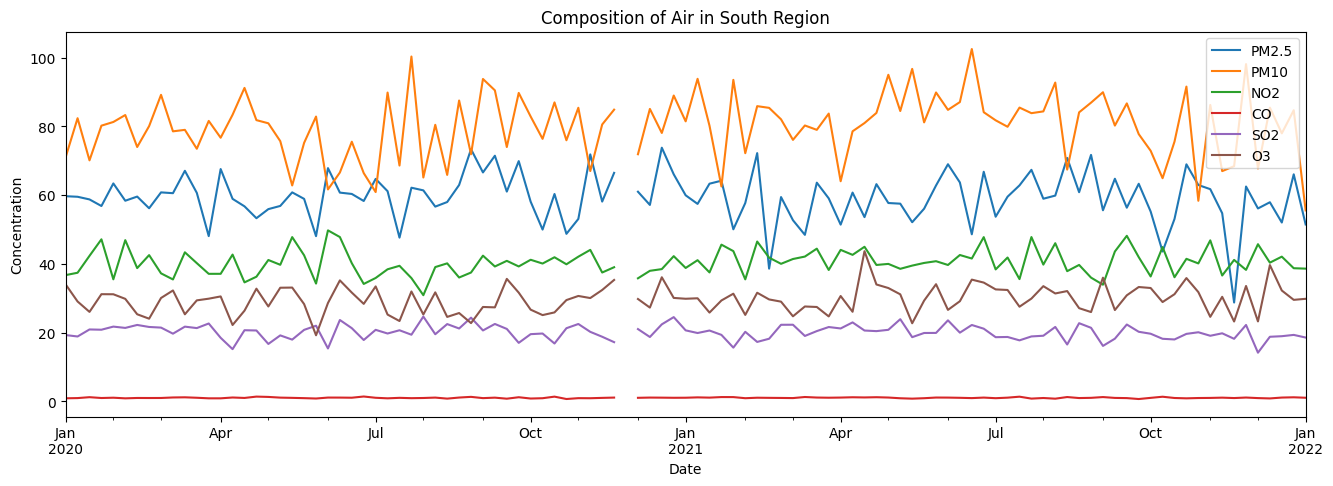

In [51]:
# Plotting the composition of air in south region
df_south[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']].resample('W').mean().plot(figsize = (16,5), title = 'Composition of Air in South Region', xlabel = 'Date', ylabel = 'Concentration', legend = True)
plt.show()

# **South region weather plots**

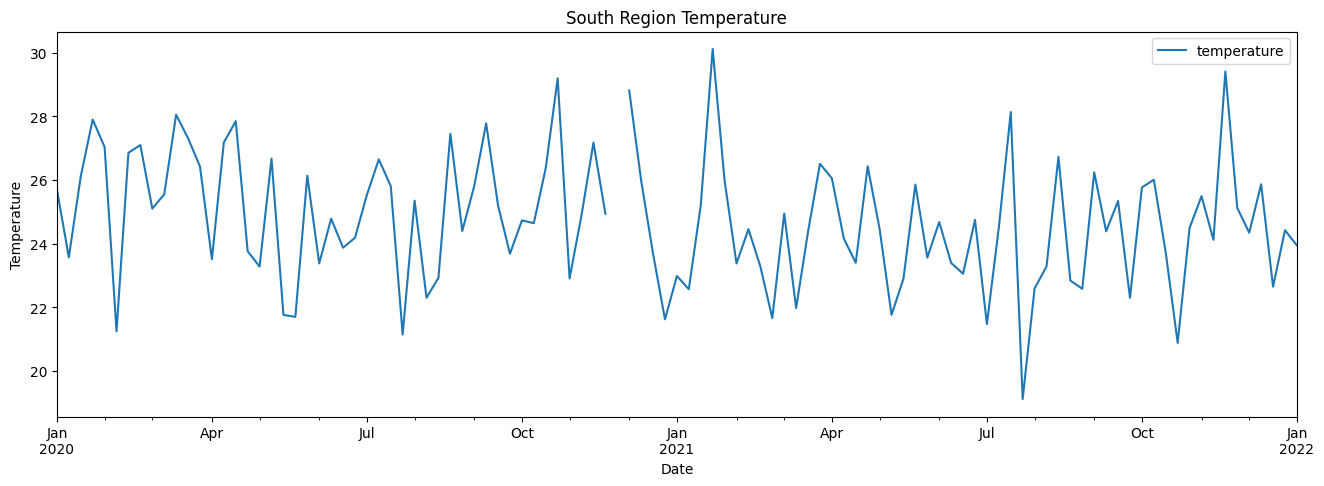

In [52]:
# Ploting temparature changes in South region
df_south['temperature'].resample('W').mean().plot(figsize = (16,5), title = 'South Region Temperature', xlabel = 'Date', ylabel = 'Temperature', legend = True)
plt.show()

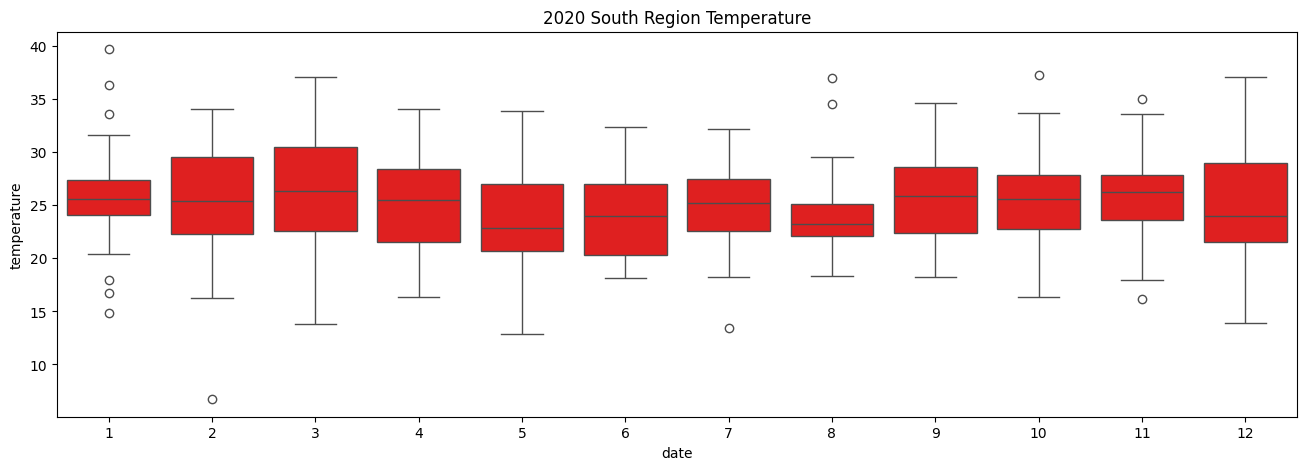

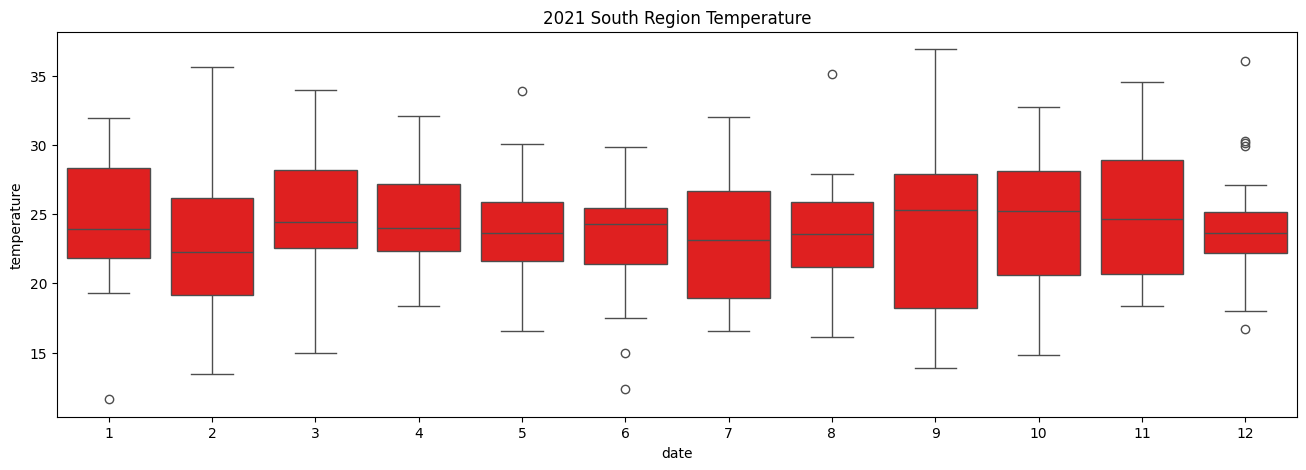

In [61]:
# South region temperature (range)
for year in df_south.index.year.unique():
  plt.figure(figsize = (16,5))
  df_year = df_south[df_south.index.year == year]
  sns.boxplot(x = df_year.index.month, y = df_year['temperature'], color = 'red')
  plt.title('{} South Region Temperature'.format(year))

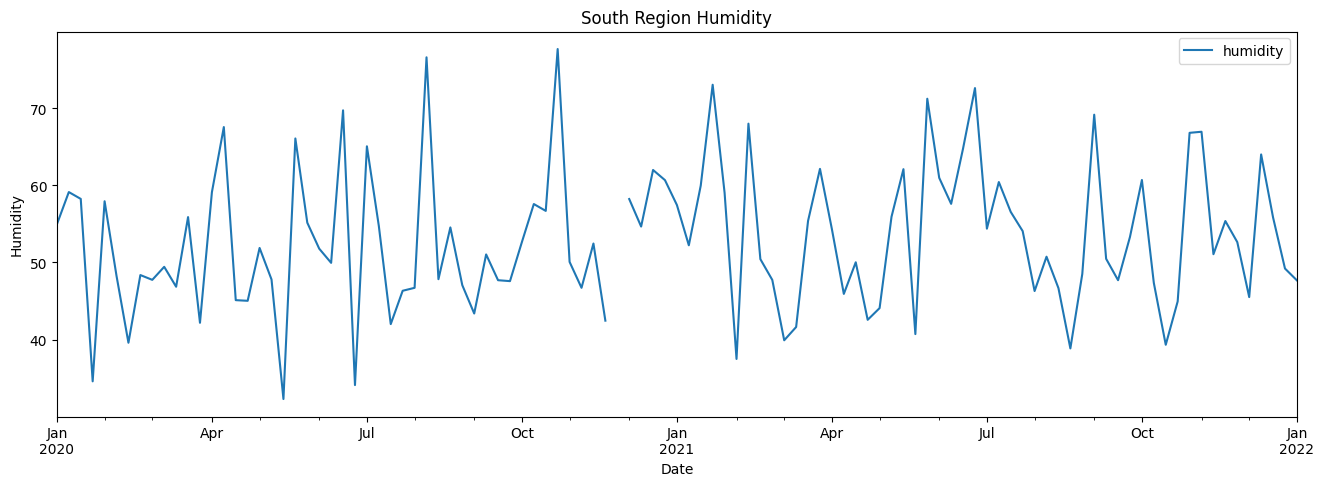

In [53]:
# plotting Humidity in South region
df_south['humidity'].resample('W').mean().plot(figsize = (16,5), title = 'South Region Humidity', xlabel = 'Date', ylabel = 'Humidity', legend = True)
plt.show()

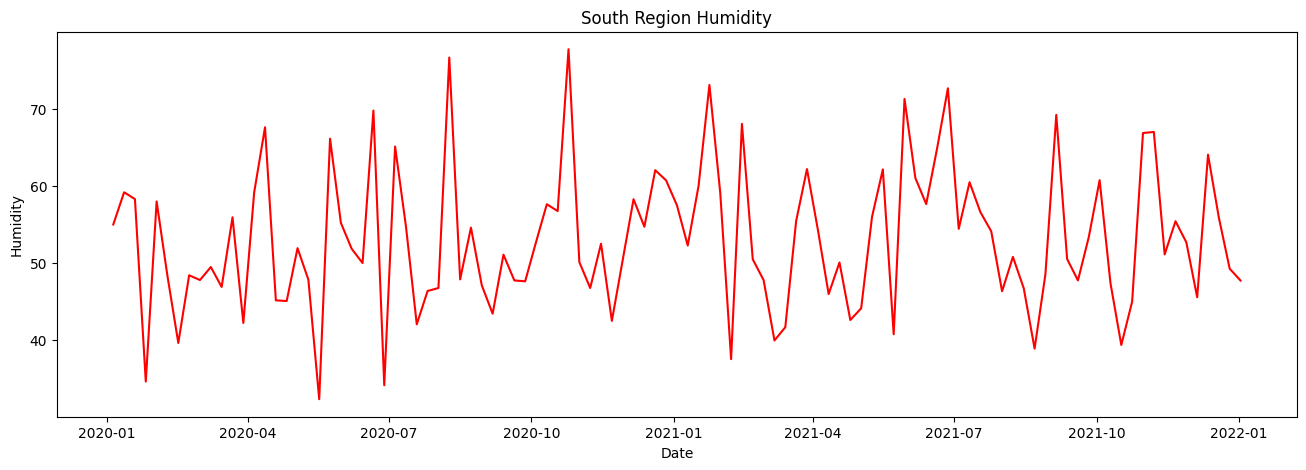

In [55]:
# plotting Humidity in South region
plt.figure(figsize = (16,5))
sns.lineplot(df_south['humidity'].resample('W').mean(), color = 'red')
plt.title('South Region Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.show()

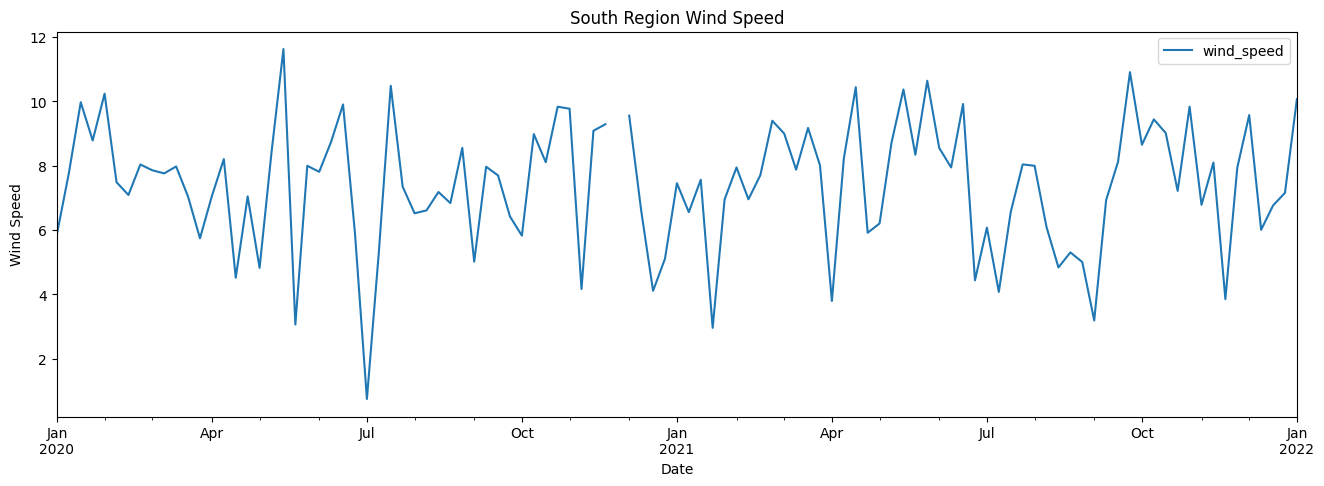

In [56]:
# Plotting the Wind Speed in South Region
df_south['wind_speed'].resample('W').mean().plot(figsize = (16,5), title = 'South Region Wind Speed', xlabel = 'Date', ylabel = 'Wind Speed', legend = True)
plt.show()

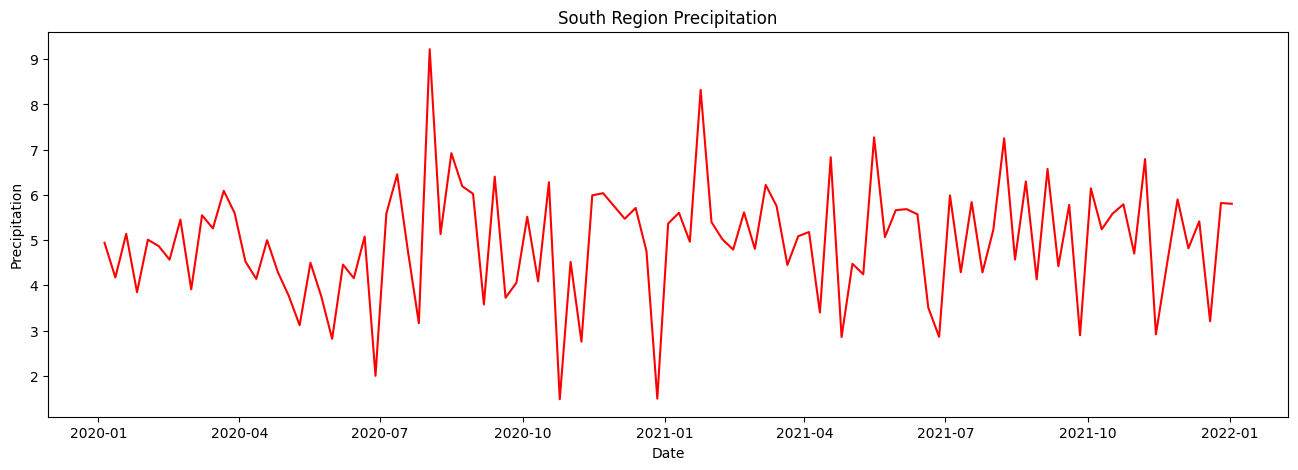

In [57]:
# Ploting the percipitation in South region
plt.figure(figsize = (16,5))
sns.lineplot(df_south['precipitation'].resample('W').mean(), color = 'red')
plt.title('South Region Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

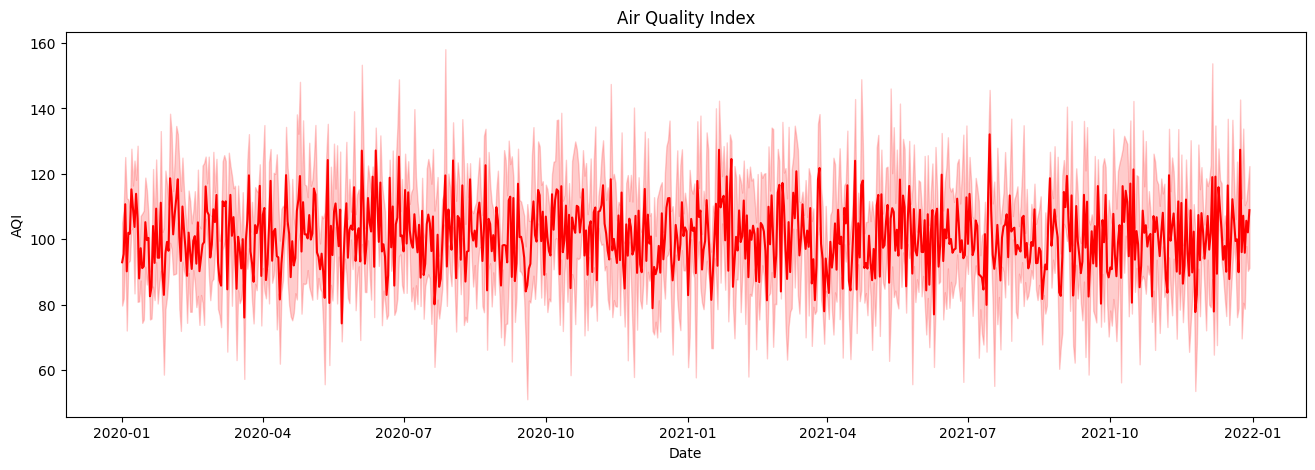

In [25]:
# Plotting AQI
plt.figure(figsize = (16,5))
sns.lineplot(data = df['AQI'], color = 'red')
plt.title('Air Quality Index')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

**Plotting region wise AQI**

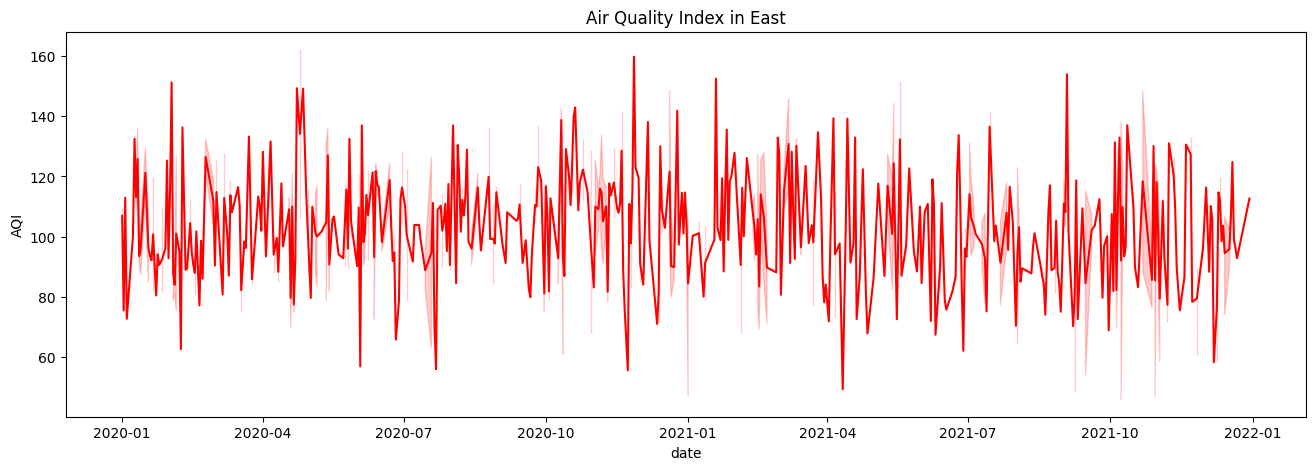

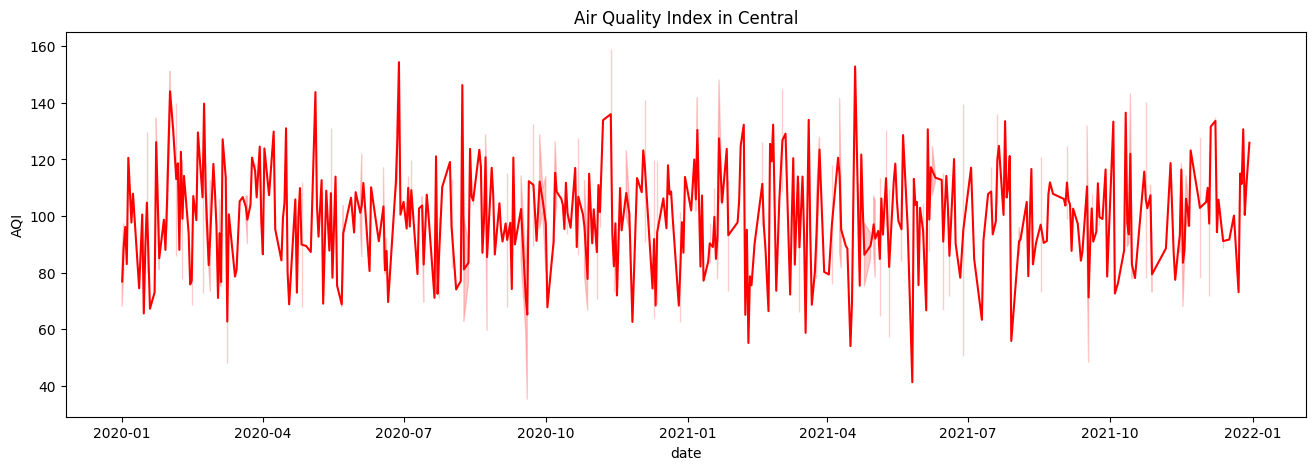

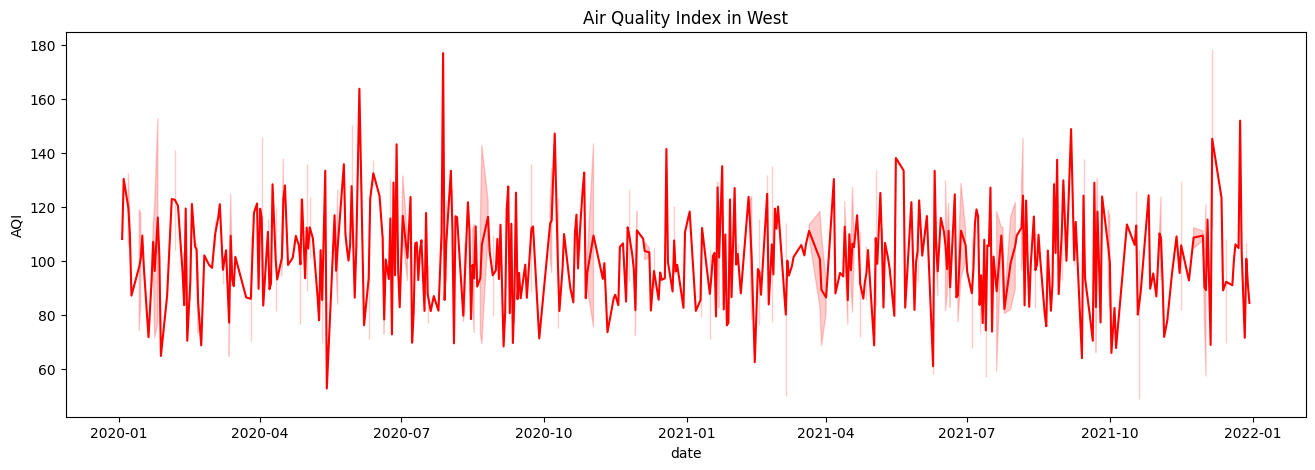

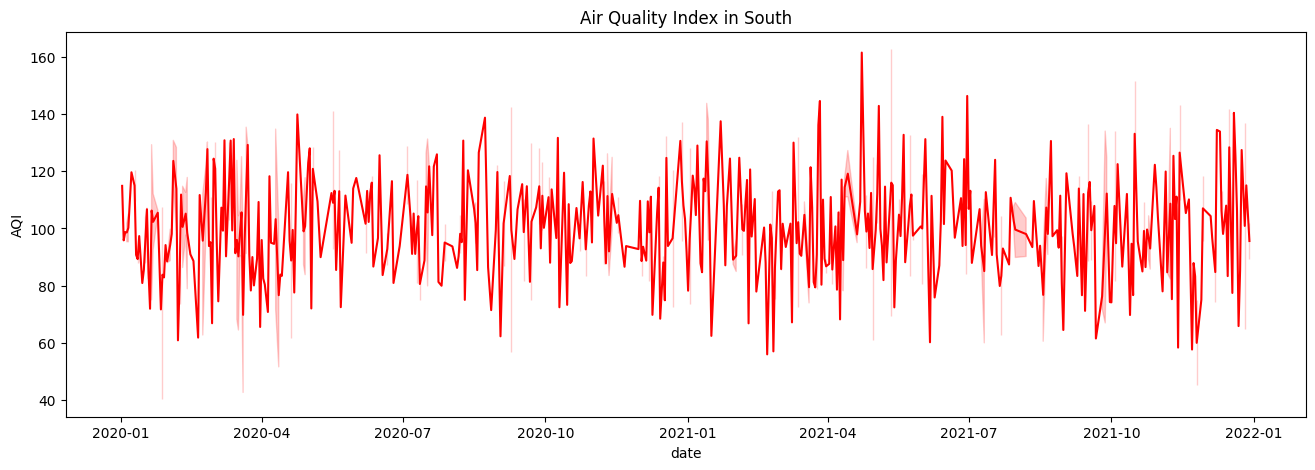

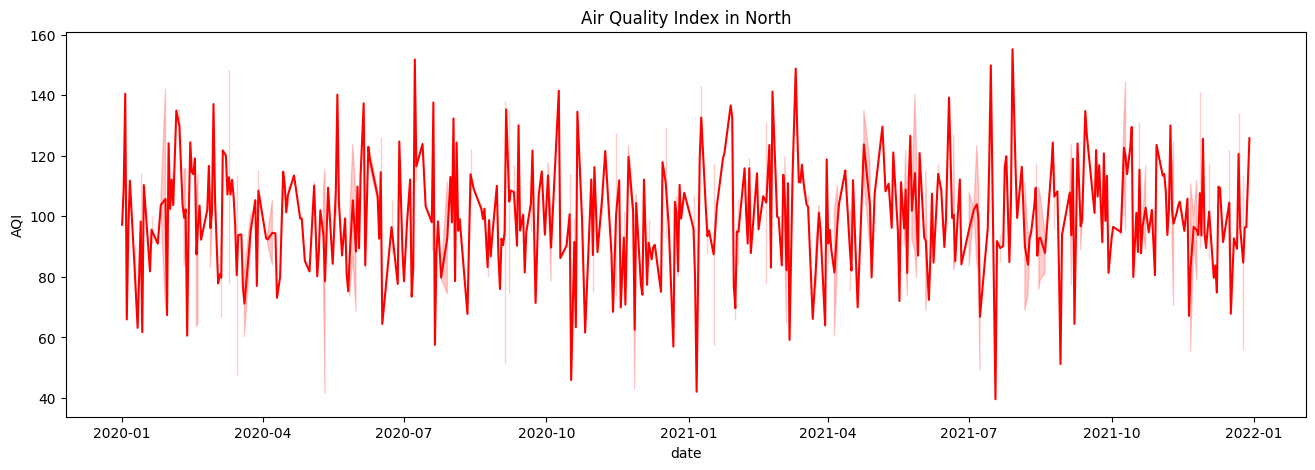

In [26]:
for region in df['region'].unique():
  plt.figure(figsize = (16,5))
  sns.lineplot(data = df[df['region'] == region]['AQI'], color = 'red')
  plt.title(f'Air Quality Index in {region}')

# **Create features**

In [27]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour
df.head()

region         AQI      PM2.5       PM10        NO2        SO2  \
date                                                                          
2020-01-01     East  109.934283  31.382887  57.718373  47.654022  25.874070   
2020-01-02  Central   97.234714  47.094225  67.381383  50.734127  10.605095   
2020-01-03     East  112.953771  53.795917  61.158796  44.986899  18.361025   
2020-01-04     West  130.460597  88.315315  69.040084  20.575023  19.791700   
2020-01-05    South   95.316933  68.348297  75.716994  38.445776  20.079543   

                  CO         O3  temperature   humidity  ...  vehicle_count  \
date                                                     ...                  
2020-01-01  0.956973  32.574682    37.555663  20.542799  ...           9757   
2020-01-02  0.990203  23.749138    24.900342  27.308785  ...           9157   
2020-01-03  1.019288  35.530851    23.437165  80.055977  ...           2058   
2020-01-04  1.284058  25.277106    22.388200  25.929988  ...           8726   
2020-01-05  0.775835  35.996440    26.881835  34.946343  ...           9720   

            construction_activity  respiratory_admissions  population_density  \
date                                                                            
2020-01-01              63.001573                      11         1957.637287   
2020-01-02               6.417798                      13         2962.769470   
2020-01-03              66.001849                       3         6912.007043   
2020-01-04              79.580923                       6         9227.543628   
2020-01-05               6.301105                       8         1277.810175   

            green_cover_percentage  year  month  day  day_of_week  hour  
date                                                                     
2020-01-01               42.348419  2020      1    1            2     0  
2020-01-02               27.712735  2020      1    2            3     0  
2020-01-03               41.031516  2020      1    3            4     0  
2020-01-04               40.543537  2020      1    4            5     0  
2020-01-05                5.648920  2020      1    5            6     0  

[5 rows x 30 columns]

In [28]:
df1 = df.drop('region', axis = 1)
df1.head()

AQI      PM2.5       PM10        NO2        SO2        CO  \
date                                                                           
2020-01-01  109.934283  31.382887  57.718373  47.654022  25.874070  0.956973   
2020-01-02   97.234714  47.094225  67.381383  50.734127  10.605095  0.990203   
2020-01-03  112.953771  53.795917  61.158796  44.986899  18.361025  1.019288   
2020-01-04  130.460597  88.315315  69.040084  20.575023  19.791700  1.284058   
2020-01-05   95.316933  68.348297  75.716994  38.445776  20.079543  0.775835   

                   O3  temperature   humidity  wind_speed  ...  vehicle_count  \
date                                                       ...                  
2020-01-01  32.574682    37.555663  20.542799    5.204995  ...           9757   
2020-01-02  23.749138    24.900342  27.308785    6.235446  ...           9157   
2020-01-03  35.530851    23.437165  80.055977    5.673999  ...           2058   
2020-01-04  25.277106    22.388200  25.929988    8.496463  ...           8726   
2020-01-05  35.996440    26.881835  34.946343    1.184104  ...           9720   

            construction_activity  respiratory_admissions  population_density  \
date                                                                            
2020-01-01              63.001573                      11         1957.637287   
2020-01-02               6.417798                      13         2962.769470   
2020-01-03              66.001849                       3         6912.007043   
2020-01-04              79.580923                       6         9227.543628   
2020-01-05               6.301105                       8         1277.810175   

            green_cover_percentage  year  month  day  day_of_week  hour  
date                                                                     
2020-01-01               42.348419  2020      1    1            2     0  
2020-01-02               27.712735  2020      1    2            3     0  
2020-01-03               41.031516  2020      1    3            4     0  
2020-01-04               40.543537  2020      1    4            5     0  
2020-01-05                5.648920  2020      1    5            6     0  

[5 rows x 29 columns]

In [29]:
df1.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20'],
              dtype='datetime64[ns]', name='date', length=3000, freq=None)

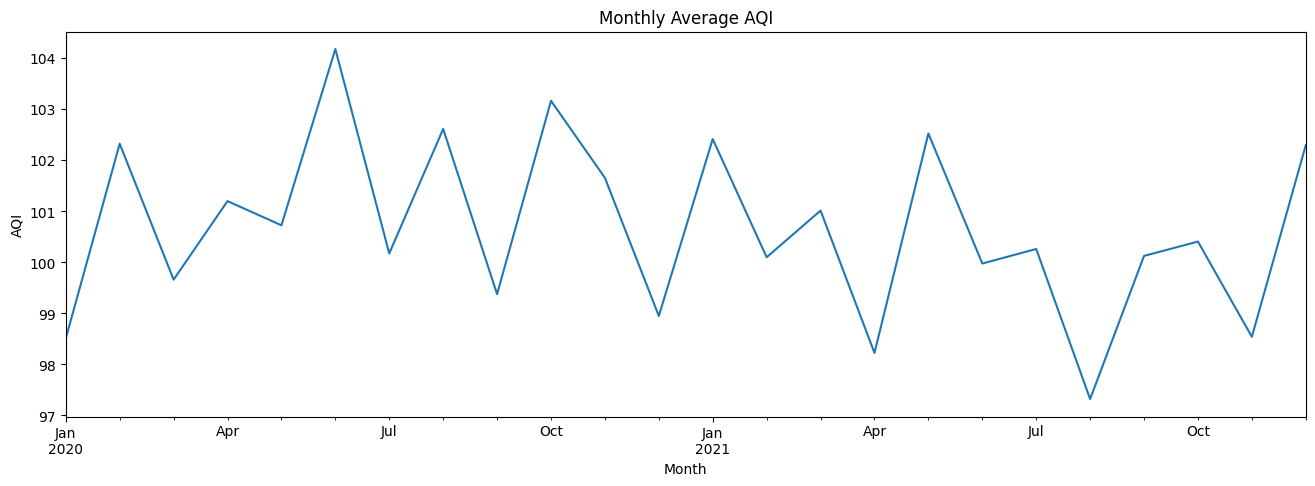

In [30]:
# creating a bar chart to display average AQI each month of each year
df1.resample('ME').mean()['AQI'].plot(figsize = (16,5))
plt.title('Monthly Average AQI')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()


In [31]:
# Calculate the 7 day rolling average of AQI
df1['7day_rolling_AQI'] = df1['AQI'].rolling(window = 7).mean()

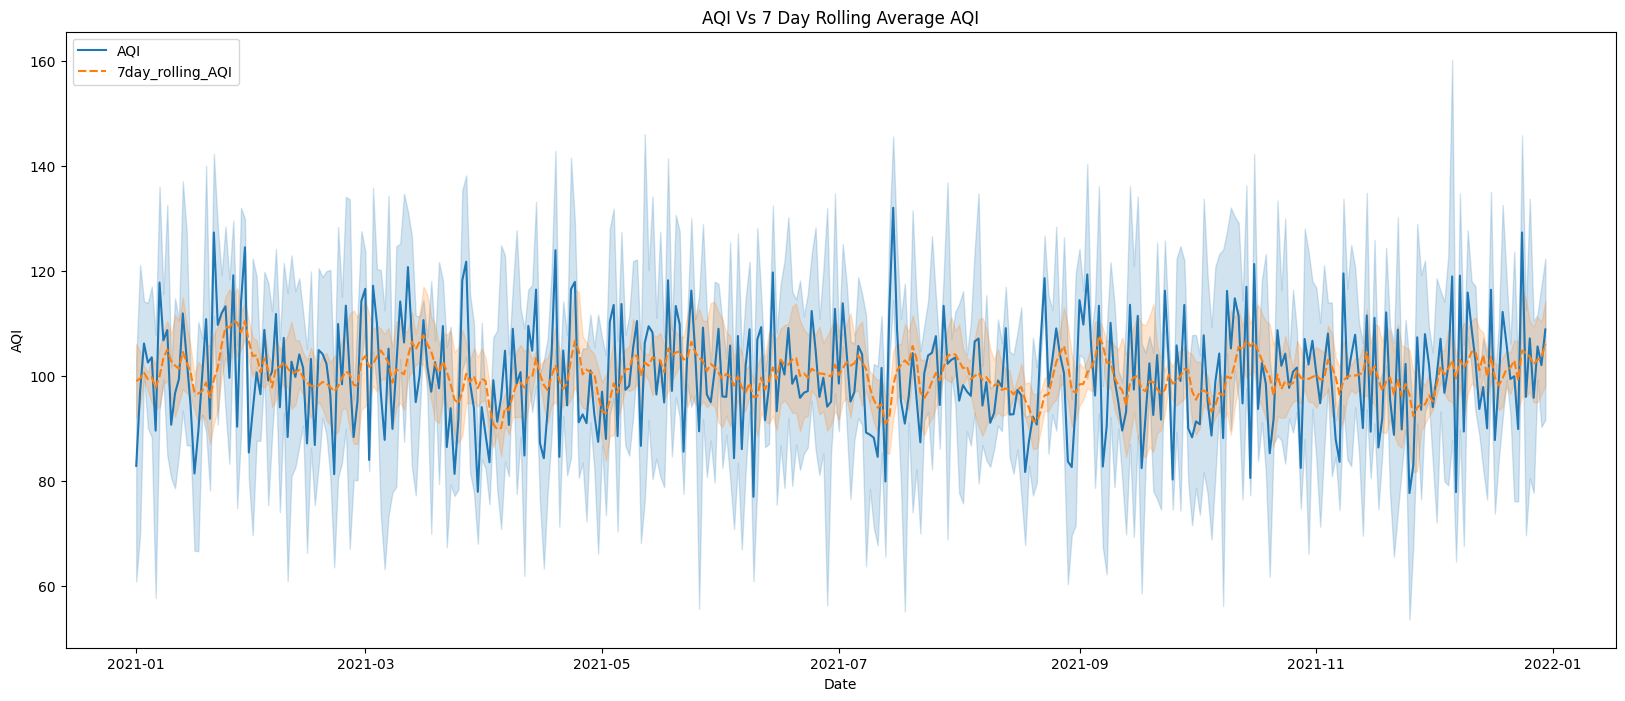

In [32]:

plt.figure(figsize = (20,8))
sns.lineplot(df1[['AQI', '7day_rolling_AQI']].loc['2021'], color = 'red')
plt.title('AQI Vs 7 Day Rolling Average AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

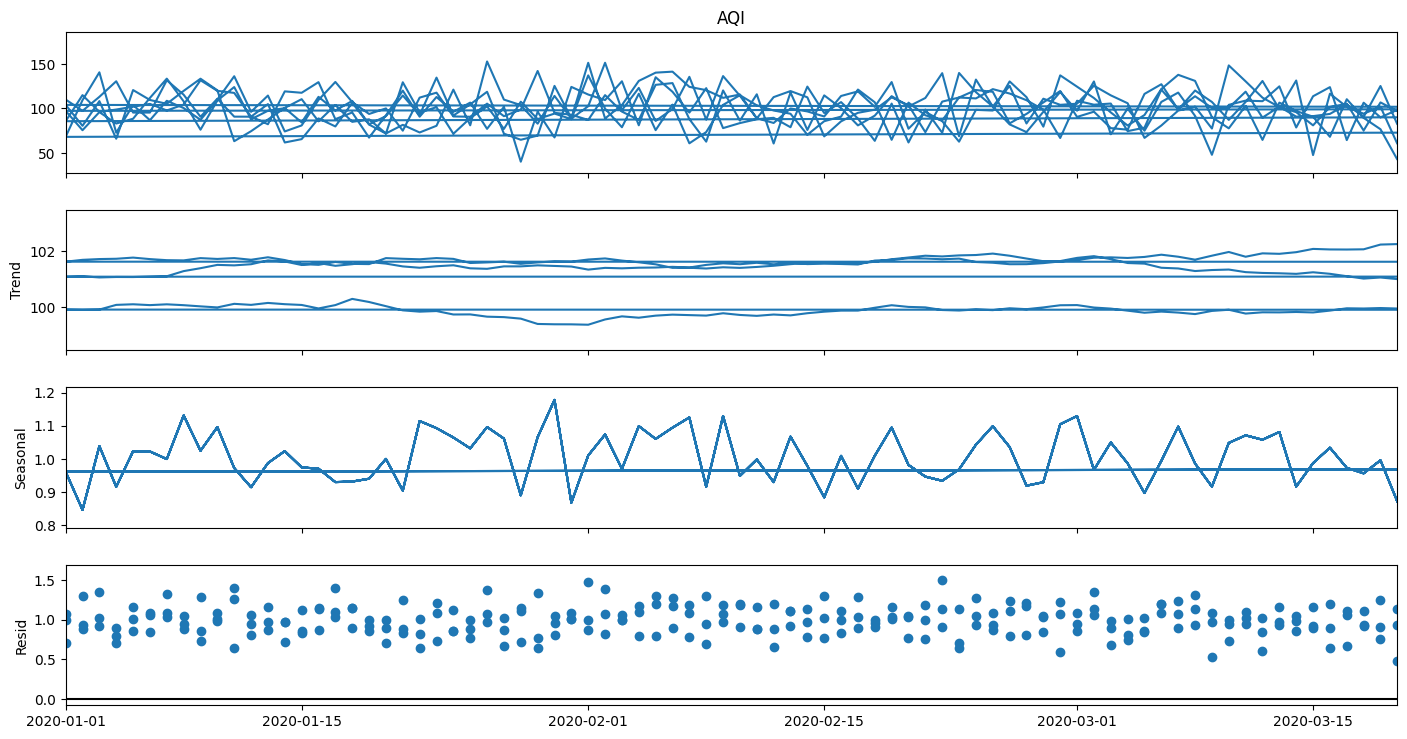

In [33]:
# Check the seasonality, trend and residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1['AQI'], model = 'mul', period = 365)
fig = decomposition.plot()
fig.set_size_inches(16,8)
plt.show()

In [34]:
# sort index
df2 = df1.sort_index(ascending = True)
df2.head(15)

AQI      PM2.5        PM10        NO2        SO2        CO  \
date                                                                            
2020-01-01  109.934283  31.382887   57.718373  47.654022  25.874070  0.956973   
2020-01-01   97.230880  77.828952   67.886400  27.333680  18.045559  0.927937   
2020-01-01   68.037513  50.468852   92.081033  38.395500  27.101355  1.138981   
2020-01-01   85.623352  78.784255  113.666292  47.145498  19.306018  0.440248   
2020-01-01  103.916905  72.870213  113.629849  27.225634  11.211063  0.146817   
2020-01-02   80.432544  47.577056   62.322622  51.565817  22.852924  0.581131   
2020-01-02   75.514035  87.740432   79.359153  30.103490  21.016381  1.279304   
2020-01-02  109.243453  59.380610   71.799412  37.198890  20.935345  1.085104   
2020-01-02   97.234714  47.094225   67.381383  50.734127  10.605095  0.990203   
2020-01-02  114.900106  62.419493   87.855367  43.090544   8.866192  1.008541   
2020-01-03   95.819535  72.646580   56.380550  33.133955  23.485913  1.147935   
2020-01-03  112.953771  53.795917   61.158796  44.986899  18.361025  1.019288   
2020-01-03  140.486192  68.340331   78.583263  37.194283  18.387389  1.128037   
2020-01-03   96.106054  69.661857   58.245026  41.339419  19.810566  1.293711   
2020-01-03  108.165055  29.722682   82.945960  52.696133  12.713504  1.187587   

                   O3  temperature   humidity  wind_speed  ...  \
date                                                       ...   
2020-01-01  32.574682    37.555663  20.542799    5.204995  ...   
2020-01-01  27.286362    32.296648  51.491412    5.402175  ...   
2020-01-01  26.891446    31.215518  87.268317    2.379946  ...   
2020-01-01  36.166265    31.053789  22.821960    1.940109  ...   
2020-01-01  39.756263    26.274096  34.945222    1.455540  ...   
2020-01-02  22.764839    33.580380  89.819678   14.211450  ...   
2020-01-02  32.335727    21.738684  42.838284    5.278425  ...   
2020-01-02  29.860927    20.253602  35.065952    5.862775  ...   
2020-01-02  23.749138    24.900342  27.308785    6.235446  ...   
2020-01-02  35.381816    27.470881  29.745416   12.347358  ...   
2020-01-03  33.565148    27.292934  39.754291    8.323477  ...   
2020-01-03  35.530851    23.437165  80.055977    5.673999  ...   
2020-01-03  28.064631    28.730870  33.820070    4.461378  ...   
2020-01-03  22.618011    25.895639  55.925336   12.368717  ...   
2020-01-03  21.173658    24.504397  68.830664    6.241186  ...   

            construction_activity  respiratory_admissions  population_density  \
date                                                                            
2020-01-01              63.001573                      11         1957.637287   
2020-01-01              86.939209                      17         7504.238032   
2020-01-01              55.676101                       5          317.291536   
2020-01-01              63.393111                      12         1089.105373   
2020-01-01              17.891791                      10          443.323021   
2020-01-02               6.621110                      11         2638.754447   
2020-01-02              49.168875                      10         6064.822628   
2020-01-02              12.523466                       8         3589.695413   
2020-01-02               6.417798                      13         2962.769470   
2020-01-02              67.774142                      13         7896.608059   
2020-01-03              84.418247                       9         8671.865478   
2020-01-03              66.001849                       3         6912.007043   
2020-01-03              83.622468                      10          647.427286   
2020-01-03              22.549815                       7         2997.798160   
2020-01-03              25.443624                      11         4881.708739   

            green_cover_percentage  year  month  day  day_of_week  hour  \
date                                                             